In [1]:
import numpy as np
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import math
import random

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理

In [4]:
x_best=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46579213e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71096554e-04, 0.00000000e+00, 4.49506713e-03, 0.00000000e+00,
       5.66382447e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.67657184e-01,
       0.00000000e+00, 0.00000000e+00, 4.19932806e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00360227e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.24139884e-01, 0.00000000e+00, 0.00000000e+00,
       2.90019042e-02, 0.00000000e+00, 2.62874018e-04, 0.00000000e+00,
       0.00000000e+00, 6.64067446e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.15709263e-02, 0.00000000e+00,
       9.40422168e-01, 8.51308850e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.44103733e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.49173503e-03, 2.98725466e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.04331364e-04,
       1.08783334e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.88229020e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.58055635e-01, 9.84544289e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.62851585e-02, 0.00000000e+00,
       0.00000000e+00, 9.85098601e-01, 0.00000000e+00, 4.45557056e-02,
       0.00000000e+00, 0.00000000e+00, 4.26488885e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.96688515e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71458844e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.86381708e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14744527e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.05927209e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.97249218e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.25549919e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.92255096e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.19802923e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08369366e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.86939062e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.50028104e-06, 3.28252901e-01, 1.39045401e-02,
       6.23529412e-01, 5.92156863e-01, 2.35294118e-01, 1.41176471e-01,
       0.00000000e+00, 4.68033609e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.53179120e-04, 0.00000000e+00,
       1.65885553e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.70588235e-01, 9.95564037e-01,
       9.52386323e-01, 9.96065416e-01, 9.96078431e-01, 9.45098039e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 7.76470588e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 8.04697011e-01,
       6.66666667e-01, 2.03921569e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.40495159e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.35117956e-03,
       0.00000000e+00, 0.00000000e+00, 3.20159117e-01, 4.47058824e-01,
       2.82352941e-01, 4.47058824e-01, 6.39215686e-01, 8.90196078e-01,
       9.96078431e-01, 8.82352941e-01, 9.96078431e-01, 4.95993609e-01,
       2.36729978e-01, 9.80392157e-01, 8.98039216e-01, 9.96078431e-01,
       9.96078431e-01, 6.69668329e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.06244336e-02, 0.00000000e+00, 1.45779230e-02,
       0.00000000e+00, 0.00000000e+00, 5.19269059e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.10260095e-03, 0.00000000e+00,
       1.68761037e-03, 0.00000000e+00, 0.00000000e+00, 6.66666667e-02,
       2.58823529e-01, 5.49019608e-02, 2.62745098e-01, 2.62745098e-01,
       2.62745098e-01, 2.31372549e-01, 8.37523110e-02, 2.86881110e-03,
       9.96078431e-01, 4.15686275e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.13758110e-03, 2.40590646e-03, 3.69659366e-02,
       0.00000000e+00, 1.54374353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.92064483e-03,
       5.96781149e-04, 0.00000000e+00, 3.25490196e-01, 9.92156863e-01,
       8.19607843e-01, 7.05882353e-02, 5.12408144e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.17299034e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.02836915e-06,
       8.08306814e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.62745098e-02, 9.13725490e-01, 1.00000000e+00,
       3.25490196e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.96154632e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.78094269e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.43975089e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69266385e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.94250275e-01, 0.00000000e+00, 1.07537992e-03,
       0.00000000e+00, 5.05882353e-01, 9.96078431e-01, 9.33333333e-01,
       1.72549828e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.64496634e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.81051947e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.05541600e-01, 9.82298935e-01,
       3.98626673e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.21779657e-01, 9.76470588e-01, 9.98883734e-01, 2.43137255e-01,
       0.00000000e+00, 0.00000000e+00, 1.09179652e-02, 6.33466836e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.24737161e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.98278793e-01, 0.00000000e+00, 0.00000000e+00,
       5.21568627e-01, 6.09461271e-03, 4.19955480e-03, 1.96078431e-02,
       3.36306618e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.05547119e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.04649617e-02, 0.00000000e+00, 4.19498481e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.10116266e-02, 9.95659696e-01, 0.00000000e+00, 3.60284134e-02,
       8.03921569e-01, 9.72549020e-01, 1.07350200e-02, 0.00000000e+00,
       2.12906050e-01, 2.48219209e-04, 0.00000000e+00, 6.09120279e-01,
       1.34819748e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.94378406e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.53654385e-03, 3.80979526e-04,
       9.79728150e-01, 0.00000000e+00, 0.00000000e+00, 1.29077499e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.94117647e-01,
       9.96078431e-01, 7.20377065e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47464378e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.56049796e-01,
       0.00000000e+00, 1.84250922e-02, 0.00000000e+00, 0.00000000e+00,
       9.95758532e-01, 6.42139012e-04, 4.01300952e-03, 0.00000000e+00,
       1.64381433e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94112118e-01, 9.84313725e-01,
       9.45828230e-01, 2.23529412e-01, 0.00000000e+00, 2.28754169e-02,
       0.00000000e+00, 2.75613726e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.65285053e-02, 0.00000000e+00, 3.21014386e-03, 2.56508898e-02,
       0.00000000e+00, 9.78258243e-01, 9.96893198e-01, 0.00000000e+00,
       0.00000000e+00, 2.15323556e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.45098039e-02, 8.52983864e-01, 9.96078431e-01,
       6.50980392e-01, 1.32317939e-02, 9.80209573e-01, 0.00000000e+00,
       0.00000000e+00, 9.96945841e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.36712987e-03, 0.00000000e+00, 0.00000000e+00,
       3.50174955e-05, 8.95568447e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.93599784e-01, 9.22745646e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.39533733e-02, 0.00000000e+00,
       1.78396762e-01, 7.96078431e-01, 9.96078431e-01, 8.58823529e-01,
       9.60831749e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.89743956e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.70217973e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.51030013e-02,
       1.49019608e-01, 9.96078431e-01, 9.50819506e-01, 3.01960784e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.62988525e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.47851828e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.65032916e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.49556890e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.21568627e-01,
       8.78431373e-01, 9.96078431e-01, 4.42807352e-01, 3.92156863e-03,
       9.73081884e-01, 0.00000000e+00, 9.97396466e-01, 0.00000000e+00,
       0.00000000e+00, 9.89316241e-01, 1.87511268e-04, 0.00000000e+00,
       9.37135110e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.83782271e-01, 0.00000000e+00, 0.00000000e+00, 5.21568627e-01,
       9.96078431e-01, 9.96078431e-01, 2.02832893e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.19452374e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.72386163e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.86803795e-01, 9.49805941e-01,
       9.96078431e-01, 9.96078431e-01, 2.03921569e-01, 4.43274538e-04,
       0.00000000e+00, 0.00000000e+00, 3.68809756e-02, 0.00000000e+00,
       0.00000000e+00, 1.27992068e-05, 0.00000000e+00, 0.00000000e+00,
       6.13051115e-02, 0.00000000e+00, 0.00000000e+00, 6.43504814e-03,
       1.28059494e-04, 4.56522532e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.77662310e-01, 9.96078431e-01,
       9.96078431e-01, 8.59031484e-01, 1.56862745e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.47295026e-04, 6.35183922e-03,
       0.00000000e+00, 2.59613987e-02, 0.00000000e+00, 0.00000000e+00,
       4.58193182e-03, 0.00000000e+00, 4.74509804e-01, 9.96078431e-01,
       8.11764706e-01, 7.05882353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.69615248e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
#x_dif = x_best*255-x_test[0]
x_dif = x_best-x_test[0]/255
x_dif

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.46579213e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71096554e-04,  0.00000000e+00,  4.49506713e-03,  0.00000000e+00,
        5.66382447e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.67657184e-01,
        0.00000000e+00,  0.00000000e+00,  4.19932806e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00360227e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.24139884e-01,  0.00000000e+00,  0.00000000e+00,
        2.90019042e-02,  0.00000000e+00,  2.62874018e-04,  0.00000000e+00,
        0.00000000e+00,  6.64067446e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15709263e-02,  0.00000000e+00,
        9.40422168e-01,  8.51308850e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [6]:
for i in range(784):
    if abs(x_dif[i]) < 1.00000000e-05:
        x_dif[i] = 0.00000000e+00
print(x_dif)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.46579213e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.71096554e-04  0.00000000e+00  4.49506713e-03  0.00000000e+00
  5.66382447e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.67657184e-01
  0.00000000e+00  0.00000000e+00  4.19932806e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.00360227e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.24139884e-01  0.00000000e+00  0.00000000e+00
  2.90019042e-02  0.00000000e+00  2.62874018e-04  0.00000000e+00
  0.00000000e+00  6.64067446e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.15709263e-02  0.00000000e+00
  9.40422168e-01  8.51308850e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.44103733e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.49173

In [7]:
# test
count = 0
for i in range(784):
    if x_dif[i] != 0:
        count+=1
print(count)

166


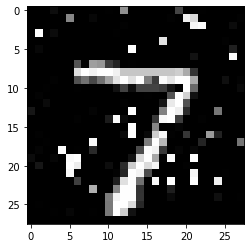

In [15]:
# test
x_re = x_dif+x_test[0]/255
re = x_re.reshape(28,28)
plt.imshow(re,cmap='gray')
plt.show()

In [7]:
model = load_model('mnist_model.h5')

In [16]:
# test
result=model.predict(re.reshape(1,784))
result[0][7]

0.14939691

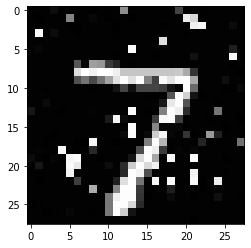

置信度： 0.16375378
[3.4588391e-03 1.1695357e-03 2.5991020e-01 5.4018939e-01 1.3946334e-04
 1.6104322e-02 3.8938484e-05 1.6375378e-01 1.3621782e-02 1.6137344e-03]


In [8]:
# test
import copy
x_d1 = copy.deepcopy(x_dif)
for i in range(784):
    if x_d1[i] > 0:
        x_d1[i] = x_d1[i] - 1.00000000e-02
        #if x_d1[i] < 0:
            #x_d1[i] = 0
    elif x_d1[i] < 0:
        x_d1[i] = x_d1[i] + 1.00000000e-02
        #if x_d1[i] > 0:
            #x_d1[i] = 0
d1 = x_d1+x_test[0]/255
plt.imshow(d1.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(d1.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

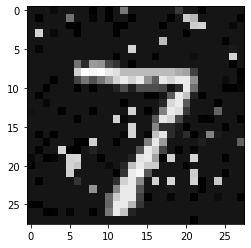

置信度： 0.34505397
[3.0264431e-03 1.3087669e-03 2.1066701e-01 4.1573691e-01 1.5183075e-04
 1.2950740e-02 3.0164816e-05 3.4505397e-01 9.1819894e-03 1.8920602e-03]


In [11]:
# test
import copy
x_d2 = copy.deepcopy(x_dif)
for i in range(784):
    if x_d2[i] > 0:
        x_d2[i] = x_d2[i] - 1.00000000e-01
        #if x_d2[i] < 0:
            #x_d2[i] = 0
    elif x_d2[i] < 0:
        x_d2[i] = x_d2[i] + 1.00000000e-01
        #if x_d2[i] > 0:
            #x_d2[i] = 0
d2 = x_d2+x_test[0]/255
#print(x_d2)
plt.imshow(d2.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(d2.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

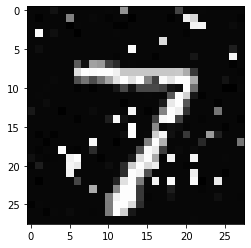

置信度： 0.17293409
[3.3870402e-03 1.1844344e-03 2.5036192e-01 5.4124159e-01 1.4167991e-04
 1.5743654e-02 3.7854355e-05 1.7293409e-01 1.3290757e-02 1.6769441e-03]


In [10]:
# test
import copy
x_d2 = copy.deepcopy(x_dif)
for i in range(784):
    if x_d2[i] > 0:
        x_d2[i] = x_d2[i] - random.randint(0,3)/100
        #if x_d2[i] < 0:
            #x_d2[i] = 0
    elif x_d2[i] < 0:
        x_d2[i] = x_d2[i] + random.randint(0,3)/100
        #if x_d2[i] > 0:
            #x_d2[i] = 0
d2 = x_d2+x_test[0]/255
#print(x_d2)
plt.imshow(d2.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(d2.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

In [8]:
def Func(x):
    d3 = x+x_test[0]/255
    result=model.predict(d3.reshape(1,784))
    return result[0][7]

迭代: 1
置信度： 0.15102999


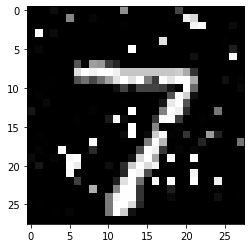

迭代: 2
置信度： 0.1528463


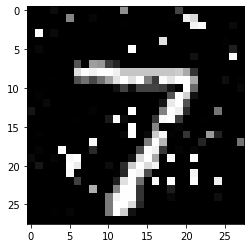

迭代: 3
置信度： 0.15459083


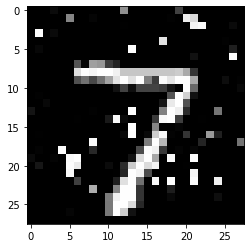

迭代: 4
置信度： 0.15696447


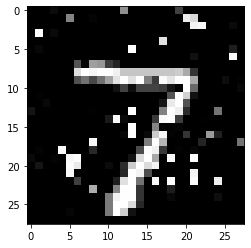

迭代: 5
置信度： 0.1594971


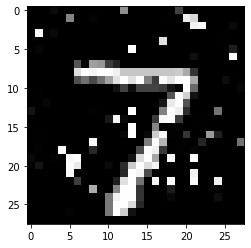

迭代: 6
置信度： 0.16164714


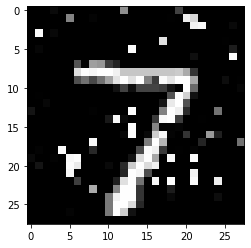

迭代: 7
置信度： 0.16339055


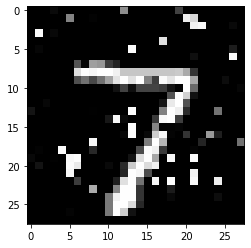

迭代: 8
置信度： 0.16560218


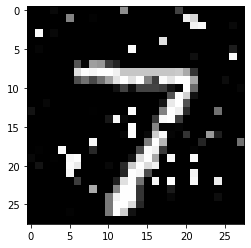

迭代: 9
置信度： 0.16799982


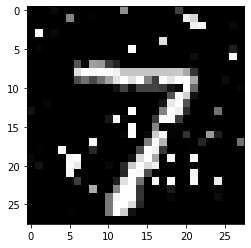

迭代: 10
置信度： 0.17016259


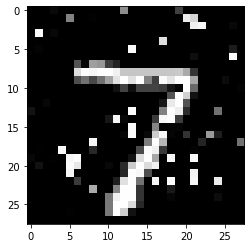

迭代: 11
置信度： 0.17252384


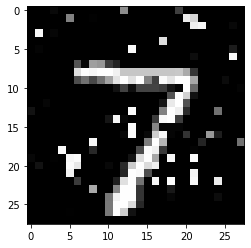

迭代: 12
置信度： 0.17493162


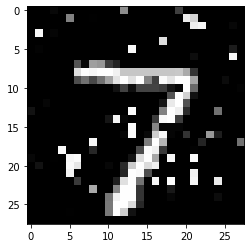

迭代: 13
置信度： 0.17770956


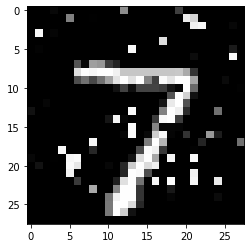

迭代: 14
置信度： 0.18039194


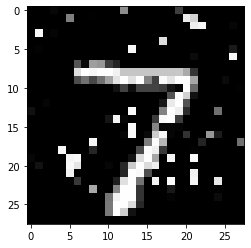

迭代: 15
置信度： 0.18317698


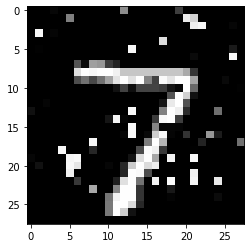

迭代: 16
置信度： 0.18557252


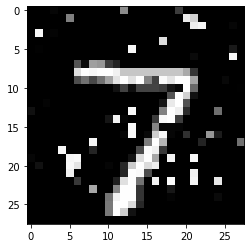

迭代: 17
置信度： 0.18781427


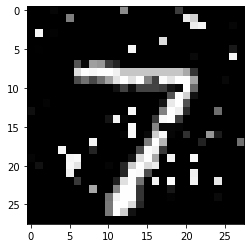

迭代: 18
置信度： 0.19029912


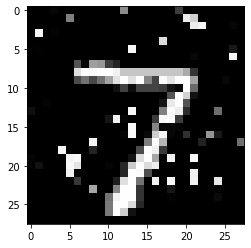

迭代: 19
置信度： 0.19269252


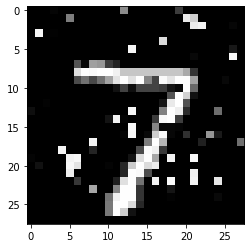

迭代: 20
置信度： 0.19501093


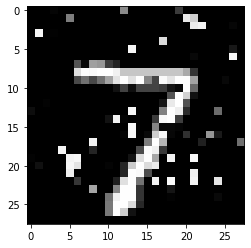

迭代: 21
置信度： 0.19732259


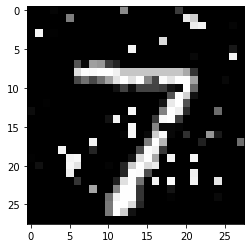

迭代: 22
置信度： 0.20018703


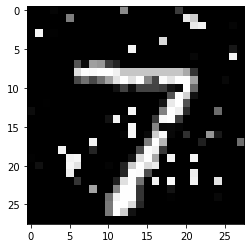

迭代: 23
置信度： 0.20254013


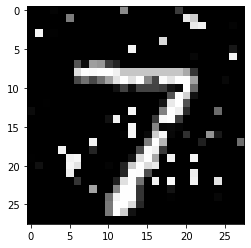

迭代: 24
置信度： 0.20480736


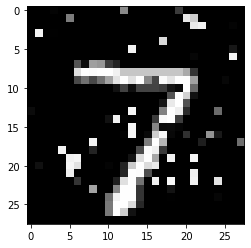

迭代: 25
置信度： 0.20728181


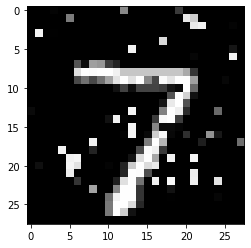

迭代: 26
置信度： 0.20980096


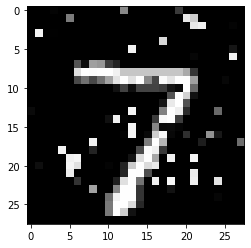

迭代: 27
置信度： 0.21229121


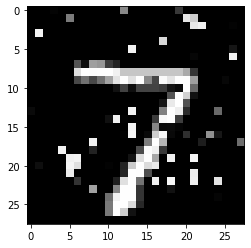

迭代: 28
置信度： 0.21457027


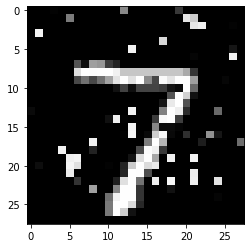

迭代: 29
置信度： 0.21755789


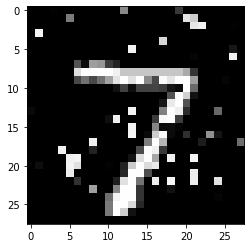

迭代: 30
置信度： 0.22036526


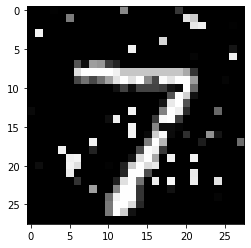

迭代: 31
置信度： 0.22247374


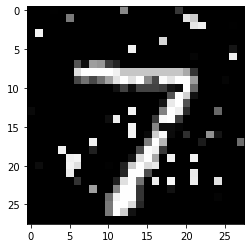

迭代: 32
置信度： 0.22500134


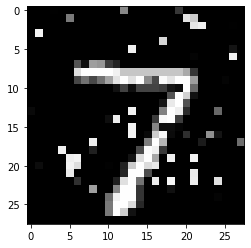

迭代: 33
置信度： 0.22716704


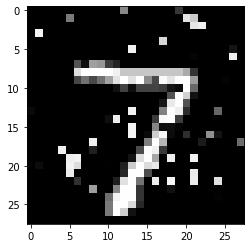

迭代: 34
置信度： 0.22977602


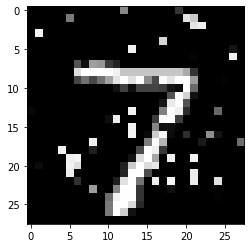

迭代: 35
置信度： 0.23235819


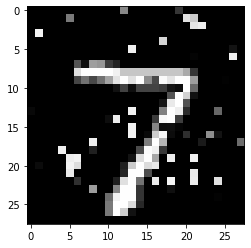

迭代: 36
置信度： 0.234726


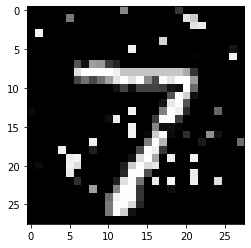

迭代: 37
置信度： 0.23738612


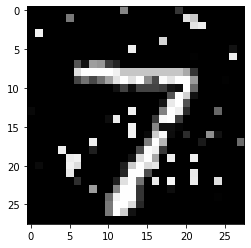

迭代: 38
置信度： 0.23989974


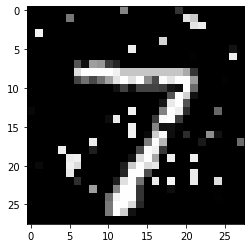

迭代: 39
置信度： 0.24269125


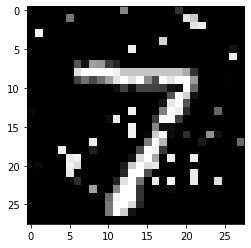

迭代: 40
置信度： 0.2455143


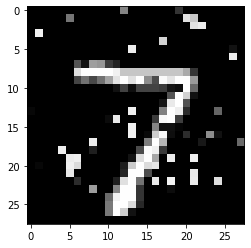

迭代: 41
置信度： 0.24863967


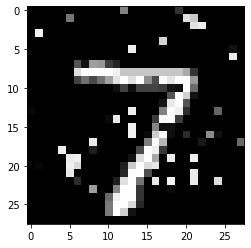

迭代: 42
置信度： 0.24999268


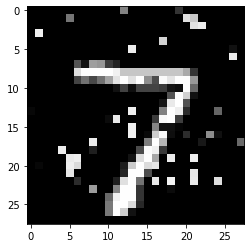

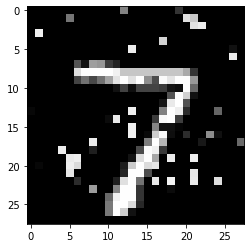

最终置信度： 0.24999268
[3.5068286e-03 1.1739271e-03 2.3195313e-01 4.8491693e-01 1.5232248e-04
 1.4322293e-02 3.6108479e-05 2.4999268e-01 1.1965757e-02 1.9801634e-03]


In [11]:
import copy
x_d3 = x_dif
x_t = x_d3
E = 0.25
count = 0
for t in range(100):     # 累计迭代次数
    for k in range(100):      # 未能维持置信度的循环上限
        x_d3 = copy.deepcopy(x_t)
        for i in range(784):    # 误差减小操作
             if x_d3[i] > 0.00000000e+00:
                x_d3[i] = x_d3[i] - random.randint(0,3)/1000
                if x_d3[i] < 0:
                    x_d3[i] = 0
        
             elif x_d3[i] < 0.00000000e+00:
                x_d3[i] = x_d3[i] + random.randint(0,3)/1000
                if x_d3[i] > 0:
                    x_d3[i] = 0
        if Func(x_d3) < E:
            x_t = x_d3
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_d3))
            t3 = x_t+x_test[0]/255
            plt.imshow(t3.reshape(28,28),cmap='gray')
            plt.show()
            break
        else:
            #print(Func(x_d3))
            continue
    
t3 = x_t+x_test[0]/255
plt.imshow(t3.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(t3.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

In [16]:
n = math.ceil(8*(1-0/16)-1)
n
#x_m = random.randint(1,m)/10
#x_m

7

0.1931974
0.20692909
0.32067645
0.20844099
0.2361045
0.237865
0.16070427
0.1997226
0.22680853
0.19355243
0.16728036
0.23679721
0.17437896
0.18519744
0.14928436
迭代: 1
8
置信度： 0.14928436


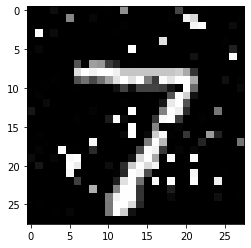

0.20998022
0.21462373
0.21666162
0.19535121
0.21226397
0.1622371
0.2064377
0.19478446
0.20702882
0.1995833
0.1524817
0.24026658
0.207743
0.20000947
0.21603146
0.19828328
0.3936108
0.19712974
0.285262
0.15005504
0.16531055
0.1753752
0.17276351
0.17272824
0.16000591
0.20776428
0.19315782
0.240871
0.25044268
0.19352354
0.1539636
0.21770436
0.15996967
0.22030559
0.15762559
0.23442265
0.2698468
0.3963706
0.3351393
0.2511118
0.24704683
0.19222859
0.22410634
0.22367848
0.1636835
0.2204291
0.18107913
0.34831995
0.19958337
0.22069404
0.16341448
0.25289
0.21203773
0.16730607
0.1572368
0.24763858
0.38483658
0.3155265
0.37027636
0.23761494
0.18756343
0.15423587
0.27343234
0.2850983
0.24063635
0.278526
0.15769617
0.28713238
0.24745929
0.1500768
0.23775539
0.14928207
迭代: 2
8
置信度： 0.14928207


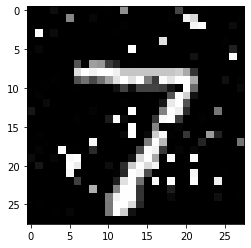

0.14892729
迭代: 3
8
置信度： 0.14892729


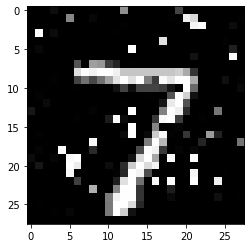

0.20386212
0.17430153
0.22433111
0.211379
0.20366983
0.22707702
0.24811797
0.18018259
0.15371183
0.38889882
0.19062738
0.21728222
0.19725247
0.2867055
0.15019822
0.33692917
0.17208211
0.24168123
0.20671141
0.18151145
0.24677795
0.18602996
0.18243104
0.24221376
0.22937399
0.24220277
0.17295612
0.1801423
0.30795848
0.20161802
0.18229488
0.1873878
0.2072322
0.3278853
0.21135329
0.2582467
0.19947252
0.20627144
0.22933184
0.15428078
0.28219348
0.1657957
0.2826637
0.17103495
0.16414969
0.21831197
0.4715986
0.16474788
0.16717
0.15556373
0.15498622
0.24461706
0.29214153
0.16426657
0.16114914
0.2426554
0.24979192
0.2136291
0.15278222
0.3098849
0.1622177
0.26360196
0.14994551
0.16618942
0.22855325
0.24732645
0.18162498
0.20245425
0.1625408
0.18317819
0.1793047
0.19276375
0.19448382
0.1592627
0.14990968
0.1947094
0.25469306
0.19798106
0.24350327
0.17038259
0.21357031
0.27888858
0.17590554
0.21943946
0.18270943
0.21533276
0.18236159
0.2230647
0.17350367
0.16610667
0.17656177
0.17666982
0.20458952


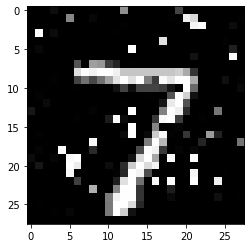

0.22954598
0.3250763
0.20095412
0.2355762
0.2314333
0.25016856
0.2606253
0.18900566
0.20588416
0.17538665
0.18256368
0.15551549
0.15889864
0.33631152
0.16080323
0.26821902
0.32118836
0.20006034
0.24740274
0.18169285
0.3233087
0.14875793
迭代: 5
8
置信度： 0.14875793


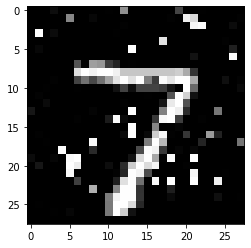

0.23473962
0.20380609
0.2136999
0.18766217
0.16033383
0.28790462
0.17626901
0.15080091
0.245398
0.15661637
0.34379008
0.16339217
0.14877371
0.24784069
0.21043426
0.16446953
0.16611528
0.27695286
0.20693047
0.1658423
0.15818483
0.18928677
0.21295156
0.37982482
0.14876501
0.15397172
0.28220028
0.16846639
0.18264928
0.3530372
0.2504028
0.21787725
0.15864743
0.17268044
0.22225177
0.22501633
0.17704572
0.16599686
0.22087075
0.18822977
0.22036481
0.25354958
0.26831353
0.23059233
0.3060805
0.19775201
0.16461314
0.21977839
0.28009084
0.18656799
0.19969305
0.20541327
0.1822444
0.18827638
0.18529576
0.22654633
0.17368457
0.19346116
0.24070032
0.15888476
0.14940114
0.16853759
0.23152623
0.17886505
0.23985958
0.17948776
0.18953481
0.20793226
0.15788461
0.18077478
0.30206257
0.19514991
0.26768833
0.18078922
0.18585655
0.19283979
0.1487053
迭代: 6
8
置信度： 0.1487053


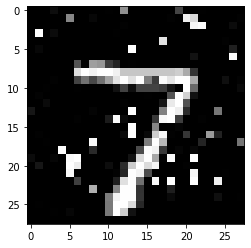

0.18095896
0.22703561
0.22100785
0.26844615
0.18421699
0.16840017
0.26115212
0.17397775
0.2633867
0.21677276
0.14891125
0.18036856
0.24504867
0.2211942
0.34239608
0.16677134
0.20888005
0.1491357
0.25659284
0.2881618
0.19666535
0.18810561
0.2840239
0.16537803
0.16553116
0.18793365
0.2611021
0.19475688
0.17155527
0.18046868
0.26561204
0.16384678
0.20035121
0.22451918
0.30723223
0.21196851
0.33515245
0.1614532
0.217566
0.21820034
0.17548059
0.24013273
0.18666257
0.17965606
0.2772227
0.21978854
0.24900803
0.26343337
0.17366217
0.18027061
0.21817581
0.1912119
0.24835528
0.16921039
0.16414906
0.16049118
0.23631287
0.37558135
0.15954329
0.4042716
0.19350708
0.20399475
0.1487053
0.20210113
0.28468186
0.18789059
0.19806647
0.16880038
0.15629701
0.28048566
0.15869746
0.3839508
0.24691686
0.22277273
0.3097083
0.24067628
0.16480044
0.14869823
迭代: 7
8
置信度： 0.14869823


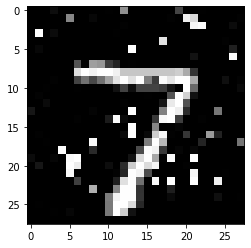

0.2629962
0.15090118
0.17439124
0.15174022
0.19525003
0.24155656
0.19769673
0.18386874
0.1777202
0.2254973
0.25513977
0.21759017
0.30731153
0.2364305
0.24474442
0.17159651
0.2391432
0.18084963
0.23545262
0.17105933
0.22152568
0.20085184
0.28808743
0.1781242
0.15393318
0.19857587
0.16797312
0.24921161
0.254624
0.20142753
0.18594497
0.18932718
0.16408533
0.31940618
0.26781344
0.21954076
0.19448738
0.18729925
0.21732092
0.20150098
0.18260598
0.21254179
0.3765476
0.16368593
0.14947174
0.16818807
0.23416008
0.19231413
0.16569035
0.20195131
0.19597034
0.17530228
0.2632933
0.26634765
0.16904746
0.2938406
0.24662302
0.18369469
0.26880458
0.16039677
0.19881445
0.22315852
0.16615234
0.2597871
0.18318811
0.23726372
0.15880612
0.17126912
0.18912978
0.22574183
0.18043418
0.2565769
0.2619127
0.26292863
0.16606855
0.2820399
0.228391
0.23948929
0.2763657
0.16007084
0.220073
0.1480649
迭代: 8
8
置信度： 0.1480649


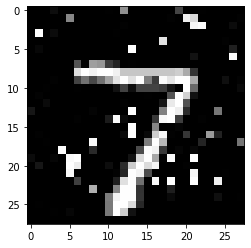

0.30300868
0.1480403
迭代: 9
7
置信度： 0.1480403


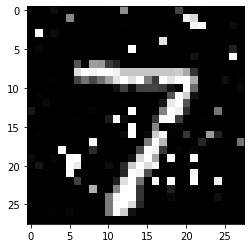

0.17690812
0.37868986
0.14820004
0.20696422
0.35587052
0.1480403
0.19781403
0.15484034
0.20881921
0.1534475
0.21779513
0.18788402
0.19036545
0.21328384
0.1623755
0.44625568
0.27313915
0.19246325
0.27037397
0.27551824
0.21371254
0.17179514
0.19282934
0.26680747
0.31904885
0.15914346
0.26635244
0.175223
0.15076801
0.31131968
0.2350784
0.17898028
0.19499242
0.28508323
0.14802153
迭代: 10
7
置信度： 0.14802153


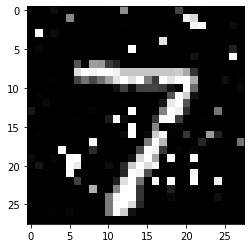

0.1481559
0.15048791
0.2965311
0.15290773
0.23870105
0.21870345
0.43334243
0.22352464
0.23519443
0.20730963
0.4658298
0.24802493
0.3204472
0.31335524
0.33337465
0.26419857
0.18071361
0.23978719
0.22929402
0.16861375
0.22951438
0.17729394
0.31651345
0.16766842
0.24520694
0.32276332
0.24775288
0.26284713
0.282035
0.2905772
0.17208809
0.31855154
0.26349333
0.17216201
0.25389042
0.14790441
迭代: 11
7
置信度： 0.14790441


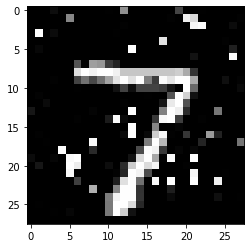

0.22263204
0.17498457
0.18663672
0.17437264
0.24365012
0.3608752
0.30019668
0.24782252
0.15624705
0.25838342
0.22607102
0.17744476
0.2839359
0.39130023
0.18569373
0.24231029
0.20918469
0.1585409
0.23946989
0.22606313
0.15467572
0.2886608
0.3671781
0.2569092
0.19944637
0.19916447
0.36108628
0.18221384
0.22689745
0.20757277
0.16140789
0.16236824
0.2550084
0.2029309
0.2623151
0.29301745
0.20552935
0.30964315
0.26150075
0.2321391
0.14785862
迭代: 12
7
置信度： 0.14785862


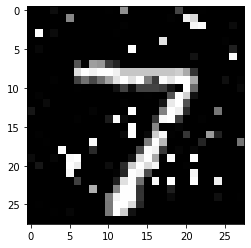

0.18427914
0.2152254
0.26299292
0.32855332
0.14986295
0.16927269
0.18406905
0.48149478
0.15875274
0.24458542
0.19714597
0.19632147
0.22774632
0.2178801
0.3414756
0.15472603
0.21227203
0.15763012
0.27762732
0.27046236
0.1482188
0.21114245
0.23105444
0.21742873
0.18466803
0.19243571
0.16157506
0.26682302
0.15105246
0.19521871
0.16796793
0.22217631
0.23041093
0.21077251
0.21915764
0.23570259
0.24874645
0.37292454
0.18644762
0.15041235
0.23026393
0.22760858
0.17428711
0.3159185
0.31611142
0.18552378
0.29759613
0.17454001
0.21642573
0.19118214
0.32826528
0.22880304
0.18500935
0.26126
0.1602024
0.32811186
0.2409619
0.20483221
0.32422417
0.18833755
0.27793518
0.21783406
0.17968535
0.2445087
0.15187517
0.28303897
0.16608217
0.18903938
0.17545159
0.21758097
0.16468866
0.16381988
0.19795568
0.17145237
0.15483181
0.24171878
0.26125807
0.17830935
0.18036908
0.18041743
0.21434619
0.14802986
0.28537333
0.18566786
0.16989209
0.28208318
0.28115675
0.23623356
0.15318316
0.20389073
0.20348431
0.202698
0

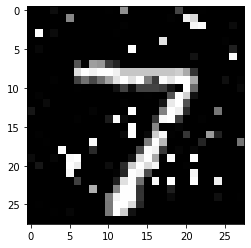

0.19680826
0.2149487
0.17119275
0.18449643
0.20821121
0.21068463
0.17790885
0.23909318
0.28192842
0.22978748
0.18691353
0.17254929
0.25485423
0.34657428
0.18101686
0.17406234
0.24688579
0.1744439
0.22745103
0.1532342
0.15611602
0.16858649
0.16165112
0.1549465
0.18632194
0.19001704
0.18549998
0.18483317
0.16111515
0.16003968
0.18628278
0.2649298
0.23587541
0.18726462
0.15689373
0.18350132
0.1539503
0.19261819
0.19578028
0.16514498
0.17232157
0.16294622
0.26599723
0.22902271
0.16562988
0.19955975
0.20751867
0.21722767
0.17832194
0.19280174
0.25725675
0.18942775
0.48913532
0.22710407
0.22361544
0.15859379
0.17659386
0.1916778
0.14794485
0.20294574
0.24091662
0.22184797
0.18469663
0.16037339
0.21386251
0.4137595
0.17644317
0.1755864
0.19841461
0.21805581
0.19903326
0.2520766
0.2278237
0.18361108
0.30654916
0.16115843
0.26002178
0.20909096
0.1972488
0.2510357
0.2789593
0.16961229
0.20127313
0.23287378
0.17294244
0.14920975
0.19916725
0.33069208
0.19081646
0.20112011
0.24784686
0.15558304
0.

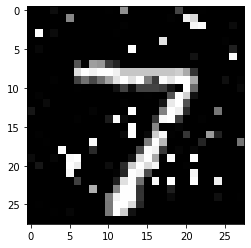

0.4160907
0.23848596
0.3130893
0.2935497
0.16189753
0.1706603
0.204756
0.17820103
0.15776281
0.2864415
0.1631133
0.16586043
0.16937387
0.25143093
0.28753388
0.2218261
0.20852353
0.25991827
0.17152017
0.17915155
0.19889137
0.21285284
0.18060122
0.25802687
0.25473818
0.28501165
0.22619575
0.18070212
0.19393986
0.2078326
0.16319479
0.26132733
0.16706473
0.19232287
0.23601252
0.20820084
0.20316933
0.2862471
0.27773643
0.33052564
0.22453481
0.23509784
0.2247287
0.1701495
0.32459214
0.1579502
0.15996103
0.15169826
0.16291934
0.16863374
0.2184413
0.19903228
0.22857535
0.1876774
0.18569258
0.2101402
0.21895467
0.1510429
0.15041053
0.16715871
0.2137148
0.30030844
0.21326107
0.19542728
0.17692064
0.18080555
0.1543211
0.21187647
0.34158698
0.18104279
0.25264454
0.40302143
0.34499568
0.2227671
0.19720232
0.24522693
0.2416635
0.2596141
0.15674828
0.17130956
0.16157943
0.21720646
0.38827866
0.1899074
0.29390472
0.2685793
0.20361468
0.23695305
0.22140688
0.28283712
0.15298595
0.20184125
0.1761276
0.1

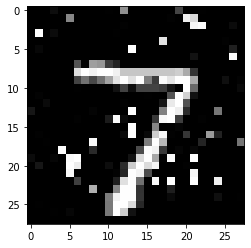

0.16892481
0.3220123
0.25891367
0.19836251
0.31382573
0.17237383
0.2505535
0.24373451
0.24087599
0.29165316
0.32459307
0.31826082
0.18044789
0.18526793
0.16337484
0.26247165
0.26495358
0.26006454
0.27942473
0.2250477
0.23276784
0.15748563
0.31808606
0.25584665
0.23748477
0.26807502
0.19280492
0.5157607
0.16851734
0.20321526
0.26187143
0.20631848
0.18053938
0.19857349
0.2506517
0.16552623
0.2573476
0.19819303
0.23820922
0.18013404
0.3570999
0.34382737
0.21845402
0.19729623
0.24343273
0.16693115
0.14787592
0.20714371
0.19906032
0.15324028
0.2627073
0.15748066
0.24076898
0.22981721
0.17352787
0.19914082
0.21591112
0.20601952
0.26232734
0.18049276
0.16923968
0.20339003
0.18645214
0.18747248
0.29352605
0.21756285
0.15245003
0.301258
0.20581117
0.19722754
0.17816523
0.34971675
0.22370736
0.17756844
0.22521634
0.3084884
0.3505948
0.2602794
0.26043883
0.25881797
0.18007813
0.24504703
0.16949256
0.16131759
0.22129023
0.16685213
0.25330874
0.18220359
0.23839429
0.21983331
0.17372094
0.24792789
0

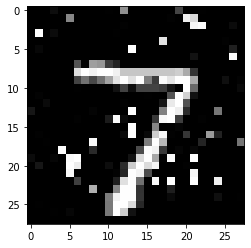

0.23813052
0.22662415
0.1825523
0.19741611
0.26000625
0.19083525
0.31067783
0.2920676
0.19097553
0.17494677
0.257687
0.2561635
0.21173467
0.16076584
0.23702051
0.29649895
0.23732746
0.17292945
0.29345977
0.27850455
0.15942857
0.26842704
0.18853799
0.16154791
0.16823913
0.15570427
0.15013467
0.27367783
0.22647622
0.1749651
0.1581945
0.23251651
0.225502
0.271965
0.19587505
0.24630518
0.25374308
0.2433486
0.16481602
0.33730468
0.22028618
0.1825445
0.18026432
0.235557
0.24304116
0.1591471
0.25724724
0.2233526
0.24884275
0.32037002
0.22770932
0.14960623
0.31077316
0.20033057
0.16018575
0.1902655
0.3103134
0.3178404
0.15812975
0.15858643
0.16615023
0.29763004
0.2039784
0.36424506
0.15587606
0.20175736
0.35699415
0.21048369
0.19440661
0.3373551
0.19426128
0.17437631
0.14819431
0.2670599
0.18444349
0.1604197
0.15071258
0.16585165
0.204137
0.21164483
0.1699009
0.19176462
0.2115368
0.2571771
0.24660185
0.21036051
0.25969374
0.17989874
0.16723634
0.16806804
0.2403265
0.1477107
0.22575364
0.226979

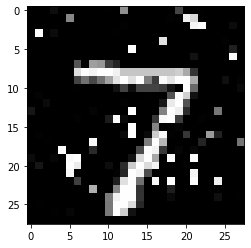

0.17474201
0.22427979
0.15414396
0.21590894
0.19323094
0.27197203
0.20418961
0.2545594
0.2352089
0.17175056
0.25885355
0.1821207
0.27607876
0.16730082
0.19583714
0.3156608
0.21737358
0.1836043
0.17515774
0.20478736
0.19148877
0.16688636
0.22116531
0.30078077
0.15767895
0.16469206
0.16558328
0.15820283
0.2350911
0.2227891
0.14788213
0.1925736
0.23706354
0.3897766
0.22558664
0.14768718
迭代: 18
6
置信度： 0.14768718


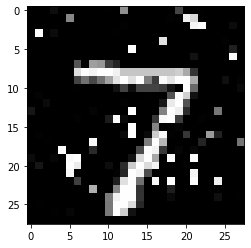

0.35528618
0.1469876
迭代: 19
6
置信度： 0.1469876


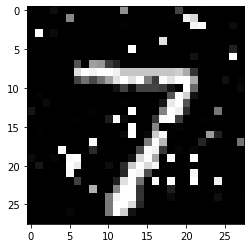

0.22632101
0.29176304
0.1972401
0.20466438
0.22265114
0.18557224
0.16448319
0.17698228
0.24655743
0.24430476
0.2728307
0.27920058
0.14751433
0.22167952
0.17340162
0.28226048
0.15478867
0.1600019
0.20183925
0.20257062
0.17309928
0.23270911
0.3056636
0.16884547
0.19391726
0.18039858
0.21609803
0.36316833
0.17726813
0.2272991
0.30088523
0.21172309
0.22239792
0.17380434
0.30810234
0.18098448
0.23589285
0.24140368
0.15727174
0.19993474
0.17374802
0.18586543
0.1471665
0.15848094
0.16258727
0.21305686
0.24616893
0.25108942
0.17838593
0.297302
0.24820082
0.2609705
0.29415467
0.17742312
0.21898028
0.2503793
0.18068963
0.28218466
0.394158
0.19980532
0.23912382
0.14699286
0.28342414
0.1707731
0.25715703
0.23442346
0.18169457
0.20875165
0.1983853
0.17462048
0.25623083
0.16585466
0.14698602
迭代: 20
6
置信度： 0.14698602


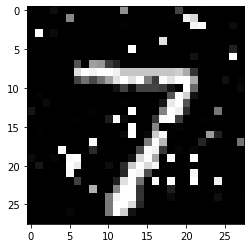

0.1620056
0.2111992
0.27344006
0.22635533
0.20075856
0.23136485
0.20477687
0.20785032
0.18031722
0.20428775
0.24876975
0.30342022
0.24311148
0.14698602
0.2121257
0.14697674
迭代: 21
6
置信度： 0.14697674


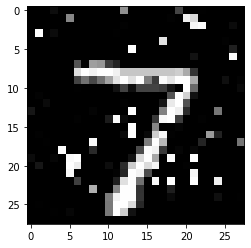

0.19002354
0.21997888
0.18855429
0.19774441
0.20245278
0.15242235
0.21194007
0.20659772
0.14682005
迭代: 22
6
置信度： 0.14682005


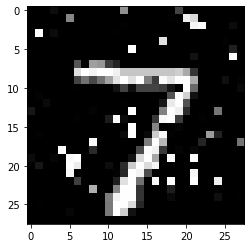

0.19640355
0.25999644
0.2029991
0.20826359
0.16089165
0.2025225
0.16615187
0.18532518
0.1614725
0.22563304
0.17142805
0.17575385
0.37081674
0.20247303
0.44930977
0.16350566
0.19719695
0.24512327
0.1545917
0.24287955
0.19433981
0.30204692
0.23255196
0.22981498
0.20051183
0.31211483
0.18855572
0.180049
0.19556613
0.19364233
0.28443912
0.21572049
0.28234348
0.22493416
0.27705786
0.16855171
0.16278462
0.24553773
0.17012577
0.22782652
0.29285833
0.2724273
0.14737377
0.30729127
0.25899088
0.1685688
0.39744002
0.25759462
0.20963848
0.17976817
0.15627898
0.17094384
0.42968628
0.18973228
0.17826305
0.2054503
0.25919074
0.15384999
0.20377947
0.1641378
0.24434163
0.19797415
0.27036947
0.19117385
0.14682014
0.20286694
0.23463282
0.16675374
0.36032784
0.22220504
0.35728166
0.24104847
0.2140941
0.19561721
0.20934409
0.20244646
0.16932702
0.17873338
0.21521655
0.37846074
0.14682442
0.19486326
0.20043203
0.2250544
0.43153167
0.2694067
0.15111229
0.14577177
迭代: 23
6
置信度： 0.14577177


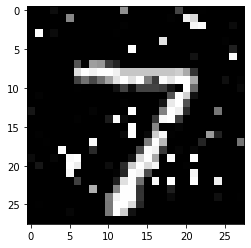

0.18058193
0.2182038
0.26872745
0.17371167
0.1879143
0.3050746
0.41190833
0.18954472
0.33847696
0.27563384
0.2650986
0.23245178
0.18321155
0.17910044
0.1658149
0.43927667
0.23433538
0.1691376
0.18911098
0.21029487
0.21737792
0.17174327
0.24673761
0.19873025
0.19632962
0.19496061
0.34054253
0.148272
0.21596192
0.21798448
0.25690413
0.15354817
0.24138883
0.27372786
0.2014994
0.27569452
0.25617594
0.21280034
0.2771869
0.3003436
0.30879033
0.2810112
0.22821683
0.18143278
0.19923249
0.15809432
0.20311232
0.35876805
0.2052138
0.20190091
0.20885977
0.36952022
0.16231507
0.15413366
0.15876766
0.16435009
0.1720934
0.17720436
0.21839683
0.2236802
0.3421827
0.21069774
0.22016092
0.20308912
0.25424483
0.21986575
0.40518212
0.23598799
0.278407
0.35887727
0.18099822
0.17457141
0.31786883
0.2293914
0.37200475
0.20602006
0.22807182
0.23843294
0.22460121
0.1794582
0.23063557
0.2915922
0.2507627
0.21113838
0.17296258
0.24740203
0.46408355
0.21442477
0.21076056
0.16775104
0.1558843
0.2728921
0.17127725
0

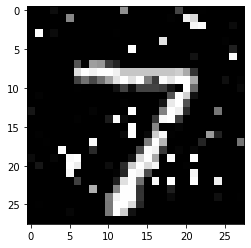

0.14925084
0.1873451
0.33838904
0.1457514
0.1809297
0.2565909
0.21518819
0.23667875
0.25739217
0.15320961
0.18929245
0.14583054
0.19950612
0.18603504
0.26295403
0.21088292
0.20965764
0.30008772
0.20564555
0.42356423
0.19126937
0.19003284
0.24012516
0.3249462
0.25908884
0.24965386
0.25914314
0.162312
0.3454108
0.24569106
0.16214181
0.27681956
0.18037818
0.203044
0.23950393
0.19577189
0.21620268
0.29998943
0.2016299
0.20347244
0.18442224
0.24761707
0.3006398
0.15887
0.20443514
0.20154694
0.23066558
0.21181716
0.22423841
0.14939582
0.23116541
0.3249794
0.20319787
0.22541012
0.23109838
0.17594326
0.29478896
0.21532789
0.28177828
0.18252602
0.15499617
0.20805606
0.20839669
0.25065765
0.24678698
0.14647044
0.15564778
0.30246
0.4137732
0.18720168
0.16082886
0.18440151
0.20313066
0.14574817
迭代: 25
5
置信度： 0.14574817


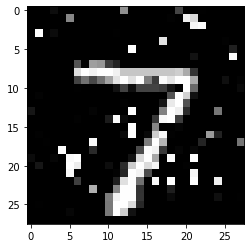

0.20477259
0.17990547
0.19943438
0.15355647
0.17524056
0.2669627
0.17115857
0.20046076
0.20244147
0.26370478
0.19928087
0.21929008
0.25470665
0.18780908
0.2389032
0.2157646
0.14574817
0.29748973
0.23005073
0.23158808
0.17766267
0.23277172
0.21234182
0.1631713
0.14572778
迭代: 26
5
置信度： 0.14572778


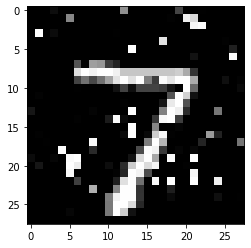

0.28497124
0.2420979
0.2823196
0.15765472
0.30795398
0.2529823
0.1876361
0.27804753
0.30413908
0.2500453
0.44000494
0.21495335
0.1482073
0.29467845
0.1512032
0.14869778
0.25613824
0.23191373
0.3137766
0.15563887
0.23616327
0.2687024
0.24837552
0.3110414
0.15535644
0.19189756
0.17732047
0.16685168
0.20624013
0.20289297
0.1951894
0.23439272
0.19932589
0.17775926
0.22217897
0.28901333
0.23679438
0.15013154
0.2543396
0.15603195
0.1969284
0.23306283
0.17083752
0.26122886
0.17953888
0.31681675
0.23505417
0.19164139
0.22982952
0.2214965
0.14595461
0.21821232
0.20861195
0.207969
0.24742232
0.18571362
0.25065652
0.23811623
0.17039174
0.20941454
0.1635793
0.15343955
0.19039175
0.21427743
0.14574724
0.1613288
0.31405136
0.16759138
0.21416725
0.43899265
0.14571239
迭代: 27
5
置信度： 0.14571239


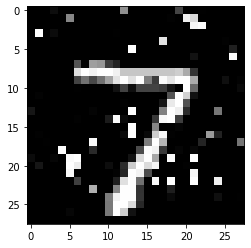

0.14575538
0.3475436
0.20171423
0.14571239
0.1628143
0.19607693
0.20490009
0.26246214
0.1821169
0.3733958
0.18786557
0.2438122
0.2679998
0.24550442
0.23752703
0.28760132
0.17636031
0.18275508
0.23197243
0.23250021
0.19452997
0.17191806
0.17196007
0.16263731
0.24999472
0.20441936
0.22199999
0.15378973
0.23129186
0.14571239
0.2849316
0.26614523
0.2666149
0.17405511
0.21899386
0.18708822
0.19859158
0.26449758
0.39083216
0.26010716
0.18549553
0.2089726
0.24096642
0.17052974
0.41515765
0.17736247
0.232879
0.18216592
0.37888625
0.19658211
0.23161396
0.15729888
0.23365898
0.23992315
0.26220736
0.22874033
0.15206827
0.16011977
0.19037464
0.2163781
0.20352353
0.29930827
0.2371218
0.19126631
0.40528858
0.18131335
0.17056902
0.21061766
0.21034141
0.22116828
0.18135953
0.21459302
0.17769298
0.22505692
0.16701673
0.25746673
0.16996525
0.19077165
0.18817315
0.23605728
0.22829238
0.17205909
0.2533929
0.3387935
0.29442626
0.19848013
0.24980122
0.37600383
0.14571239
0.16083606
0.15266775
0.2685776
0.34

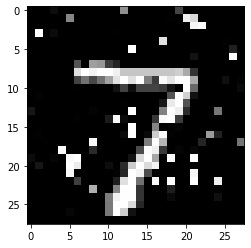

0.14618586
0.26661423
0.14558521
迭代: 29
5
置信度： 0.14558521


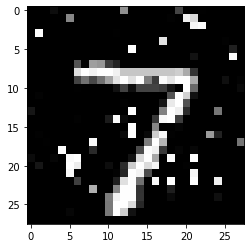

0.17900085
0.17020305
0.160778
0.2631133
0.18428479
0.16477795
0.20406578
0.40593123
0.19140485
0.1933137
0.27174416
0.19935614
0.21870674
0.23666652
0.28293246
0.17537901
0.20964459
0.18403809
0.19612521
0.24874704
0.15944001
0.24483356
0.19331786
0.18635401
0.26000813
0.23154011
0.27446184
0.18003838
0.1745729
0.25894317
0.27305666
0.23680098
0.18310553
0.1672892
0.23419644
0.29646096
0.5455865
0.30237305
0.22135156
0.27612156
0.19665237
0.16420576
0.15060759
0.15305895
0.15345939
0.15661299
0.14764276
0.26511928
0.14606051
0.19659173
0.24482413
0.21567677
0.21373428
0.1496033
0.20113541
0.3218799
0.1862997
0.15093213
0.25709176
0.21653022
0.21233979
0.20780624
0.29048604
0.17171079
0.20381427
0.17457554
0.27809182
0.17428616
0.3481615
0.15809217
0.15576486
0.21806702
0.26334482
0.23555198
0.17115624
0.24381815
0.4224918
0.33986688
0.26992074
0.25543785
0.18208507
0.22717367
0.19585977
0.23239237
0.22433122
0.22322004
0.17132488
0.1518828
0.18344773
0.21568014
0.38429233
0.19784184
0

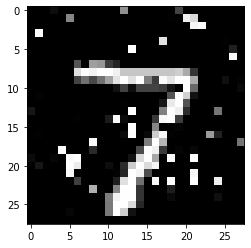

0.23826797
0.3465018
0.17053528
0.18369287
0.15826504
0.16543896
0.1668589
0.20135748
0.44174296
0.22679888
0.34980386
0.21430406
0.18407904
0.1578231
0.31967163
0.21269572
0.33173364
0.20989013
0.22315386
0.21339431
0.2662553
0.21214418
0.20049222
0.24376027
0.16475017
0.49101028
0.22350803
0.22350203
0.22061627
0.26534957
0.19190611
0.20820706
0.20883721
0.16864437
0.23386647
0.26039967
0.20349847
0.21611854
0.16561964
0.26151925
0.15414253
0.34650052
0.1705671
0.2804492
0.43218958
0.1903751
0.20312995
0.17145129
0.15620571
0.26641095
0.14555843
0.21786374
0.19164991
0.28968266
0.1997241
0.2444187
0.15878862
0.41167137
0.17160316
0.16634957
0.18509762
0.20467907
0.30552614
0.1531733
0.20155583
0.1662563
0.20516874
0.23880285
0.1786128
0.21050765
0.38116267
0.26110014
0.22601639
0.21669638
0.2566478
0.21263707
0.1634767
0.1455909
0.14593947
0.2794555
0.23539571
0.22392346
0.17219104
0.19627288
0.32224923
0.24264525
0.20827846
0.2190762
0.22368042
0.1763431
0.22666278
0.1479601
0.19564

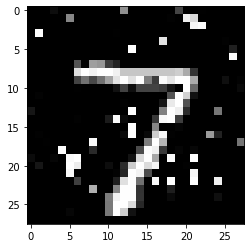

0.19776592
0.24899834
0.17319193
0.20712222
0.17994064
0.31019104
0.2075354
0.14691745
0.15606003
0.27218735
0.23306677
0.29234278
0.30149177
0.16214956
0.27576646
0.24538761
0.38151908
0.19242117
0.17094749
0.14951088
0.3203122
0.24441512
0.14553805
迭代: 32
4
置信度： 0.14553805


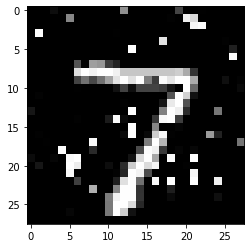

0.15624481
0.16703172
0.23411304
0.23752739
0.27285278
0.19416742
0.223123
0.17198172
0.17444603
0.1866792
0.1819464
0.33167714
0.21395722
0.14547022
迭代: 33
4
置信度： 0.14547022


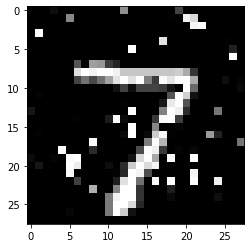

0.23698348
0.18949153
0.18466508
0.16234209
0.19803809
0.29471114
0.2747152
0.22596197
0.23231563
0.17293447
0.23442887
0.1970899
0.16419746
0.29873493
0.21696435
0.23105377
0.3484675
0.19777043
0.3491832
0.24807088
0.23657586
0.15491733
0.14547022
0.16206272
0.14920843
0.2106953
0.43144408
0.1495631
0.17367254
0.43996263
0.31034854
0.21524033
0.1537982
0.21866854
0.25625837
0.46978822
0.22570287
0.2583397
0.16566409
0.23571078
0.1758658
0.19370759
0.14651556
0.17987435
0.19495286
0.29757857
0.17025712
0.20350021
0.19473864
0.32699063
0.22301553
0.26272175
0.21550402
0.2176804
0.38349146
0.25635064
0.21799782
0.35744724
0.24561429
0.22051637
0.14579609
0.20862684
0.14553767
0.2001781
0.38028163
0.25193438
0.277602
0.2061744
0.20024389
0.26647186
0.21439539
0.18170886
0.30726585
0.3173793
0.23890944
0.18984698
0.21671161
0.17759553
0.25956953
0.18841061
0.21794526
0.32984644
0.18514018
0.15611207
0.14801036
0.21771826
0.23740506
0.2124495
0.17749247
0.21168658
0.19188249
0.18978533
0.18

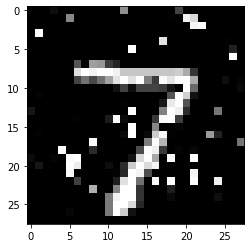

0.19397758
0.20766827
0.22381729
0.32098192
0.24417387
0.25974232
0.27337846
0.16939084
0.16026203
0.37349096
0.24365683
0.24875712
0.20001964
0.1966993
0.20302887
0.25991645
0.18898942
0.18233201
0.2460257
0.23194993
0.19111277
0.21710749
0.19127959
0.20508336
0.18448424
0.16793428
0.27922273
0.31742468
0.25029778
0.2377666
0.3330523
0.16306087
0.1893129
0.14643134
0.39149463
0.21430016
0.1758167
0.3133464
0.35831302
0.32393733
0.20551093
0.23426701
0.25957322
0.23124261
0.15080038
0.20184751
0.23374403
0.31435734
0.1988549
0.14565922
0.412914
0.22101031
0.19098833
0.32692605
0.28472635
0.21407042
0.24527714
0.21370734
0.21628107
0.2077561
0.20351626
0.22020814
0.21683301
0.15396634
0.2107943
0.35485032
0.1736173
0.34321383
0.21492833
0.18385792
0.1713685
0.15613334
0.14757888
0.16328797
0.26334843
0.31976795
0.2261137
0.33782166
0.17454296
0.14541897
0.18054214
0.19789402
0.17491938
0.18277381
0.18670517
0.24142995
0.22904421
0.15204298
0.20247917
0.21038568
0.17827982
0.16660202
0.3

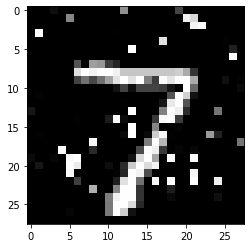

0.17707558
0.19402924
0.17437045
0.24729002
0.25763398
0.17381573
0.25016496
0.46302423
0.15694965
0.18970379
0.27099594
0.25172547
0.1739934
0.18250997
0.16994956
0.25018206
0.24966808
0.1603853
0.45348138
0.17965022
0.24232085
0.19006646
0.20240875
0.22721131
0.18046337
0.3311269
0.2108262
0.19033878
0.24675412
0.16772228
0.15659177
0.25022966
0.1990979
0.15080868
0.19437864
0.18849574
0.2410149
0.20565976
0.1974435
0.3227978
0.17667419
0.39749432
0.30119643
0.25556526
0.18043673
0.4207737
0.22497399
0.17166616
0.2095078
0.32820368
0.15644634
0.17338216
0.34290385
0.26558048
0.1664799
0.17153081
0.20470394
0.2629544
0.20497024
0.17081298
0.3487005
0.15843385
0.27457768
0.23680645
0.34180334
0.1555371
0.19029267
0.17174388
0.18107113
0.29333568
0.25329217
0.21947815
0.16855319
0.23040025
0.24312766
0.15567817
0.23446229
0.22700237
0.31914967
0.19432421
0.19660322
0.16059692
0.2178144
0.16083582
0.21105425
0.22749186
0.27754328
0.14706422
0.17802289
0.18253918
0.16771822
0.23481841
0.1

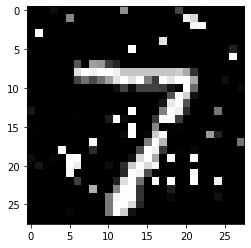

0.16724508
0.14688984
0.23033759
0.35143712
0.2181934
0.16912232
0.20595305
0.3758174
0.18988825
0.17990106
0.30124477
0.41832894
0.21836695
0.18092152
0.17659926
0.31916806
0.24779198
0.30180904
0.1683497
0.3486905
0.399645
0.1680368
0.15027939
0.26036388
0.16533084
0.3277679
0.15567264
0.31014657
0.26260632
0.18683907
0.14545135
0.19015102
0.20233366
0.3087201
0.16237491
0.1810973
0.15227747
0.22443707
0.3449314
0.16924213
0.17188315
0.16610184
0.21570067
0.21237095
0.25938702
0.16239889
0.1682049
0.17584656
0.24636334
0.31081277
0.39842868
0.15871406
0.2751406
0.16849864
0.18838386
0.22515249
0.30168146
0.17480312
0.34382495
0.18806668
0.21103987
0.17620003
0.16132946
0.20196854
0.2646223
0.2083975
0.173039
0.2743621
0.28192362
0.1821144
0.21854112
0.16388601
0.17752586
0.20190944
0.1709372
0.20267731
0.36238775
0.26222318
0.29533115
0.18067908
0.16206405
0.19540723
0.25903344
0.1805839
0.35866535
0.33341056
0.30894563
0.22814476
0.19407472
0.17310287
0.38005072
0.22376274
0.1967270

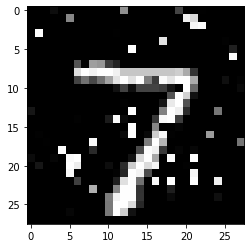

0.18295236
0.29488656
0.2132247
0.20452112
0.15300734
0.19370747
0.1499986
0.18926065
0.2616978
0.17073189
0.18684408
0.1844799
0.1550537
0.14506595
0.19361947
0.14538355
0.20468654
0.2388351
0.16958308
0.23554955
0.3641799
0.19304731
0.19444513
0.22508438
0.19667423
0.2966322
0.22843415
0.14506595
0.1771229
0.25797874
0.22359315
0.1790537
0.29575628
0.2886535
0.21022974
0.29971123
0.23124345
0.19044632
0.27037537
0.14506595
0.16840114
0.2700561
0.2205265
0.19568045
0.22816266
0.22746451
0.21860598
0.16922027
0.17345393
0.206215
0.16575062
0.23237611
0.18038504
0.28043914
0.16015969
0.3447066
0.28360376
0.26600018
0.30041024
0.23326989
0.14506595
0.19727972
0.20064315
0.18680404
0.14646818
0.22308664
0.15008447
0.19399531
0.22630319
0.16244899
0.1557614
0.19614157
0.1955985
0.3002108
0.23432007
0.19619276
0.20832738
0.37374145
0.18877946
0.15989144
0.1884722
0.19125964
0.28897378
0.16945292
0.14506595
0.18891576
0.2813639
0.21989186
0.17737313
0.20348753
0.18468754
0.21818367
0.3013793

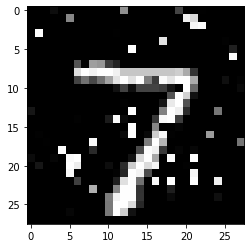

0.18712701
0.19131528
0.18459153
0.1506357
0.38433483
0.23215242
0.32367116
0.16907433
0.22575271
0.16356224
0.19575977
0.29235572
0.23584267
0.17317784
0.17883049
0.18872115
0.29943398
0.20633465
0.19156934
0.17692846
0.31692007
0.1761212
0.1743305
0.3464835
0.2057152
0.15080793
0.28301778
0.2354878
0.20759168
0.23181838
0.2279569
0.20020194
0.17961213
0.20150924
0.23867266
0.19786474
0.24284378
0.16262281
0.14774111
0.15712878
0.26882267
0.2609932
0.33546847
0.21615267
0.1943424
0.25683764
0.14605552
0.21923849
0.23486476
0.24172218
0.16484267
0.35889685
0.35104397
0.48806724
0.22846124
0.26758337
0.42962378
0.28310457
0.15932103
0.15363157
0.29248804
0.2294046
0.21916176
0.21220513
0.20491058
0.21525398
0.16679455
0.2442537
0.19684513
0.2545564
0.17310183
0.17246762
0.2810612
0.29631352
0.16327071
0.15554114
0.25933826
0.17009595
0.2467792
0.17419286
0.14879778
0.26479837
0.23987976
0.24505155
0.38090605
0.24737163
0.3361136
0.27741653
0.16556723
0.25189313
0.23628893
0.16684641
0.2

0.23309262
0.20977147
0.2386613
0.1735092
0.14525457
0.22204822
0.30609924
0.16251552
0.36342892
0.174186
0.20637107
0.17603597
0.3645011
0.25375918
0.24762256
0.25030655
0.299749
0.18341504
0.174907
0.19617577
0.3142586
0.1449911
迭代: 39
3
置信度： 0.1449911


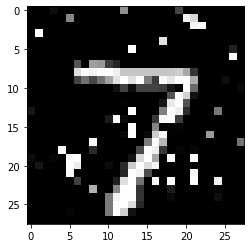

0.19140857
0.30781075
0.14517894
0.1449911
0.21216775
0.36711264
0.17239441
0.19873178
0.20669809
0.20937607
0.27677992
0.16982657
0.39133048
0.22201829
0.16584012
0.18890049
0.14517894
0.25062707
0.14995049
0.30708516
0.27515098
0.2022479
0.31196737
0.15304136
0.23278771
0.1787998
0.17044707
0.23668368
0.15944867
0.1894213
0.16499421
0.26103878
0.14518051
0.15335852
0.37201867
0.2053438
0.25928795
0.1449911
0.26601422
0.37677348
0.23149605
0.259398
0.34374288
0.17107071
0.2767787
0.27380005
0.1449911
0.25186095
0.18298832
0.2166873
0.17825438
0.22694308
0.15333085
0.15995517
0.14594136
0.1616208
0.1871757
0.2668377
0.21442063
0.3935443
0.24292867
0.15608422
0.21758321
0.3838417
0.34196824
0.2139015
0.15691583
0.2663042
0.16989139
0.26395643
0.19226384
0.21499527
0.3195957
0.2702147
0.23295952
0.23579471
0.21731889
0.1748817
0.1877453
0.22949122
0.24393836
0.30078247
0.29931515
0.18089917
0.24148987
0.4365742
0.1902652
0.17051879
0.32925826
0.16717789
0.27656507
0.24433105
0.420028
0.1

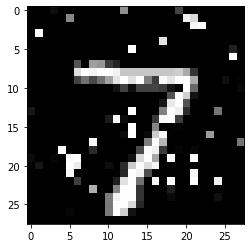

0.20136106
0.44802698
0.19269164
0.15466861
0.21931225
0.20974071
0.14960633
0.2075115
0.2251043
0.23891026
0.21415891
0.20560046
0.23743008
0.18913159
0.23214805
0.20257571
0.19140446
0.23367116
0.19098414
0.1958214
0.20279054
0.14539665
0.1951845
0.14606065
0.24722193
0.25976142
0.21200138
0.4523068
0.27814338
0.3275604
0.23081619
0.30165184
0.1981784
0.2705987
0.24599132
0.20016067
0.17398931
0.2863197
0.14956047
0.19492996
0.2017612
0.19644588
0.24306354
0.4148884
0.38400692
0.33510917
0.15920351
0.14738393
0.3018655
0.15341103
0.22736537
0.22846898
0.21475115
0.24282585
0.17308864
0.5457193
0.23461759
0.18221445
0.25430351
0.20930487
0.15364368
0.19600417
0.39919463
0.18197598
0.30629358
0.24552312
0.23254837
0.3096074
0.21631277
0.21997818
0.18156639
0.19198847
0.16017717
0.1590324
0.23727497
0.22693405
0.33946052
0.3147009
0.25000358
0.17710188
0.34989783
0.14480314
0.20198287
0.19609293
0.18019746
0.23477474
0.2881477
0.16661906
0.20132734
0.25738528
0.23339613
0.25622413
0.164

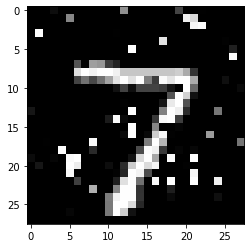

0.19742529
0.2458348
0.24546048
0.15158032
0.25259316
0.43393162
0.18010107
0.18378295
0.14676334
0.21702519
0.22822571
0.2537589
0.18845786
0.25719935
0.44693235
0.4708399
0.16498025
0.20953797
0.17843439
0.47960785
0.3273572
0.16433154
0.25241303
0.22752698
0.42902622
0.14468627
0.24292037
0.23715067
0.26693568
0.21840069
0.14487523
0.1629268
0.2941636
0.14914228
0.24432959
0.14473712
0.23283756
0.24819706
0.2615974
0.19149715
0.30680788
0.37027326
0.31358913
0.34943464
0.20554025
0.17790845
0.21109152
0.2715051
0.21990559
0.2824177
0.21903118
0.17498773
0.19805327
0.20090742
0.2875847
0.1741297
0.23802666
0.17021614
0.1607886
0.2416606
0.18941547
0.23993649
0.15332963
0.1657724
0.33309013
0.32050866
0.25036174
0.22467488
0.2250095
0.17726201
0.2082001
0.25457636
0.33849272
0.2062621
0.196832
0.25835145
0.19747816
0.1607886
0.14468627
0.23925102
0.15375836
0.23792885
0.24313766
0.19552837
0.16755031
0.17916943
0.29020625
0.22825941
0.25330305
0.16194056
0.21716999
0.33570328
0.228884

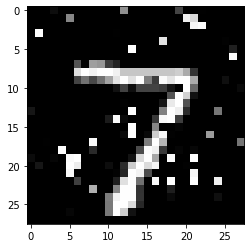

0.15048163
0.18673281
0.15323167
0.26294905
0.2333894
0.14649692
0.2363892
0.21528284
0.18274704
0.19367538
0.19651774
0.17578766
0.18506828
0.1685299
0.22028284
0.1956875
0.16342291
0.24520683
0.15244836
0.24457811
0.17641228
0.17798036
0.2282132
0.14501841
0.17724653
0.35279933
0.20623821
0.1689224
0.22737779
0.14520591
0.25980043
0.14857745
0.20910105
0.38951448
0.33269054
0.19977213
0.16194494
0.18559426
0.19518952
0.28414652
0.16682546
0.23700577
0.34567606
0.15779026
0.14468202
0.16297127
0.14468202
0.37079784
0.19551688
0.14476901
0.26883584
0.15253651
0.15324874
0.2908783
0.19750652
0.24034967
0.21098964
0.2501249
0.49271494
0.29380378
0.30668718
0.2476076
0.25398257
0.1954998
0.14494133
0.45238566
0.24629557
0.32686692
0.2522398
0.24219166
0.22807488
0.23679864
0.216797
0.1694516
0.20896485
0.16147667
0.2879022
0.2799581
0.2641204
0.18365736
0.20712666
0.21554121
0.17625324
0.2786479
0.2160901
0.1950871
0.27358332
0.17034093
0.25010785
0.41430393
0.1479276
0.2895169
0.16782993

0.16712722
0.33328277
0.2369413
0.23132458
0.15390693
0.17100339
0.20883398
0.20146151
0.30154485
0.19230096
0.19294935
0.22150789
0.29937264
0.32380304
0.24010308
0.3399222
0.1921545
0.21465269
0.23830797
0.18838143
0.37434667
0.22135048
0.25355396
0.19044653
0.27134866
0.21461053
0.14487146
0.18222466
0.1768685
0.15955698
0.22244374
0.25015092
0.41222766
0.18437715
0.2415302
0.21489583
0.2847665
0.16178113
0.23365971
0.21363613
0.3534402
0.14468202
0.39473537
0.30654716
0.2482588
0.24835098
0.1630081
0.17830333
0.21580932
0.22409375
0.24763726
0.24955773
0.2500944
0.24644932
0.15795891
0.25089145
0.21327694
0.19779
0.19244577
0.2272821
0.2929901
0.19995381
0.17583004
0.16035816
0.18957847
0.3506135
0.15149406
0.19580153
0.18657346
0.25371236
0.21122658
0.31090385
0.33778617
0.24960274
0.2090405
0.17200783
0.14538328
0.18596488
0.18773997
0.16622923
0.24146283
0.20907393
0.18460068
0.18758956
0.17305459
0.18705256
0.22129963
0.23404971
0.24237818
0.36623365
0.19963728
0.3234235
0.1718

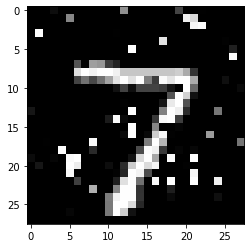

最终置信度： 0.14468202
[3.4430276e-03 1.1592309e-03 2.6961395e-01 5.4889613e-01 1.3168676e-04
 1.6028674e-02 3.8133527e-05 1.4468202e-01 1.4451294e-02 1.5558916e-03]


In [11]:
# 原图改变值减小置信度（设置上限）
import copy
x_t = copy.deepcopy(x_dif)
count = 0
M = 52     # 底数
for t in range(50):
    x_f = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    y = random.randint(0,10000)/10000
                    if y > 0.3:
                        if abs(x_f[i]) > 0.8:
                            m = math.ceil(1+7*(1-count/M))
                            if x_f[i] > 0:
                                x_f[i] = random.randint(1,m)/10
                            elif x_f[i] < 0:
                                x_f[i] = -random.randint(1,m)/10
                    if y <= 0.3:
                        x_f[i] = 0 
        print(Func(x_f))
        con += 1
        if Func(x_f) < Func(x_t):
            x_t = x_f
            count += 1
            print("迭代:",count)
            print(m)
            print("置信度：",Func(x_t))
            f = x_t+x_test[0]/255
            plt.imshow(f.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
F = x_t+x_test[0]/255
plt.imshow(F.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(F.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

迭代: 1 置信度 0.18415189
迭代: 2 置信度 0.20762621
迭代: 3 置信度 0.25642753
迭代: 4 置信度 0.20628847
迭代: 5 置信度 0.1584102
迭代: 6 置信度 0.35418937
迭代: 7 置信度 0.18610083
迭代: 8 置信度 0.18848294
迭代: 9 置信度 0.27325606
迭代: 10 置信度 0.22463903
迭代: 11 置信度 0.20646709
迭代: 12 置信度 0.17668942
迭代: 13 置信度 0.25491774
迭代: 14 置信度 0.18799321
迭代: 15 置信度 0.19748855
迭代: 16 置信度 0.4268047
迭代: 17 置信度 0.38425142
迭代: 18 置信度 0.18447882
迭代: 19 置信度 0.23501082
迭代: 20 置信度 0.20061468
迭代: 21 置信度 0.22315997
迭代: 22 置信度 0.22981668
迭代: 23 置信度 0.2830648
迭代: 24 置信度 0.17019498
迭代: 25 置信度 0.24114537
迭代: 26 置信度 0.19596462
迭代: 27 置信度 0.26410732
迭代: 28 置信度 0.32508734
迭代: 29 置信度 0.21447918
迭代: 30 置信度 0.149129
迭代成功


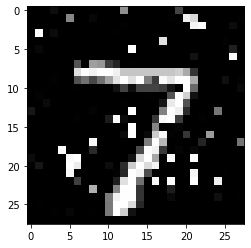

迭代: 31 置信度 0.15852685
迭代: 32 置信度 0.17125149
迭代: 33 置信度 0.16879335
迭代: 34 置信度 0.30493796
迭代: 35 置信度 0.23201887
迭代: 36 置信度 0.3894793
迭代: 37 置信度 0.17871861
迭代: 38 置信度 0.16852994
迭代: 39 置信度 0.17754127
迭代: 40 置信度 0.20258264
迭代: 41 置信度 0.21768615
迭代: 42 置信度 0.2357467
迭代: 43 置信度 0.162568
迭代: 44 置信度 0.2010352
迭代: 45 置信度 0.19884582
迭代: 46 置信度 0.27046278
迭代: 47 置信度 0.14849746
迭代成功


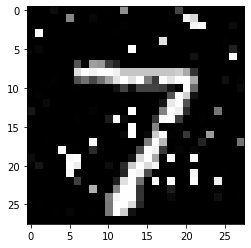

迭代: 48 置信度 0.23358367
迭代: 49 置信度 0.33683592
迭代: 50 置信度 0.20789275
迭代: 51 置信度 0.19469653
迭代: 52 置信度 0.3207319
迭代: 53 置信度 0.40262955
迭代: 54 置信度 0.15369195
迭代: 55 置信度 0.16189414
迭代: 56 置信度 0.17693478
迭代: 57 置信度 0.3279956
迭代: 58 置信度 0.19753887
迭代: 59 置信度 0.14838915
迭代成功


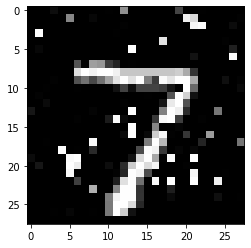

迭代: 60 置信度 0.2985836
迭代: 61 置信度 0.28738293
迭代: 62 置信度 0.15415236
迭代: 63 置信度 0.1919716
迭代: 64 置信度 0.3319913
迭代: 65 置信度 0.17375673
迭代: 66 置信度 0.22561522
迭代: 67 置信度 0.20700996
迭代: 68 置信度 0.18307185
迭代: 69 置信度 0.20828433
迭代: 70 置信度 0.17683247
迭代: 71 置信度 0.18796216
迭代: 72 置信度 0.1483808
迭代成功


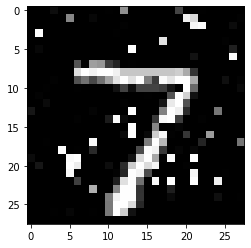

迭代: 73 置信度 0.19288932
迭代: 74 置信度 0.20072937
迭代: 75 置信度 0.24725987
迭代: 76 置信度 0.43053868
迭代: 77 置信度 0.20803136
迭代: 78 置信度 0.19567065
迭代: 79 置信度 0.24138992
迭代: 80 置信度 0.15299779
迭代: 81 置信度 0.22867613
迭代: 82 置信度 0.2362847
迭代: 83 置信度 0.2075778
迭代: 84 置信度 0.23720366
迭代: 85 置信度 0.2784776
迭代: 86 置信度 0.23422885
迭代: 87 置信度 0.24267402
迭代: 88 置信度 0.19649847
迭代: 89 置信度 0.15488411
迭代: 90 置信度 0.20259155
迭代: 91 置信度 0.26376674
迭代: 92 置信度 0.17778894
迭代: 93 置信度 0.23536615
迭代: 94 置信度 0.20550579
迭代: 95 置信度 0.15808614
迭代: 96 置信度 0.26690257
迭代: 97 置信度 0.2092335
迭代: 98 置信度 0.21773538
迭代: 99 置信度 0.19841994
迭代: 100 置信度 0.17890105
迭代: 101 置信度 0.16561687
迭代: 102 置信度 0.17787345
迭代: 103 置信度 0.15978263
迭代: 104 置信度 0.30887967
迭代: 105 置信度 0.21714818
迭代: 106 置信度 0.17662169
迭代: 107 置信度 0.1483879
迭代: 108 置信度 0.18101324
迭代: 109 置信度 0.19276232
迭代: 110 置信度 0.20925671
迭代: 111 置信度 0.201321
迭代: 112 置信度 0.20506445
迭代: 113 置信度 0.16955236
迭代: 114 置信度 0.19309427
迭代: 115 置信度 0.21421166
迭代: 116 置信度 0.1825241
迭代: 117 置信度 0.4540788
迭

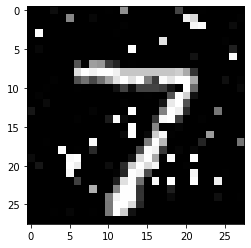

迭代: 122 置信度 0.14951412
迭代: 123 置信度 0.23887792
迭代: 124 置信度 0.24083921
迭代: 125 置信度 0.2045265
迭代: 126 置信度 0.18854614
迭代: 127 置信度 0.24172124
迭代: 128 置信度 0.25879735
迭代: 129 置信度 0.1480331
迭代: 130 置信度 0.37422135
迭代: 131 置信度 0.17740095
迭代: 132 置信度 0.20224038
迭代: 133 置信度 0.177109
迭代: 134 置信度 0.26551485
迭代: 135 置信度 0.20037039
迭代: 136 置信度 0.35113758
迭代: 137 置信度 0.19293992
迭代: 138 置信度 0.19309685
迭代: 139 置信度 0.15606053
迭代: 140 置信度 0.17669462
迭代: 141 置信度 0.17381693
迭代: 142 置信度 0.18153249
迭代: 143 置信度 0.33461317
迭代: 144 置信度 0.20226793
迭代: 145 置信度 0.25347564
迭代: 146 置信度 0.156066
迭代: 147 置信度 0.27108434
迭代: 148 置信度 0.23777534
迭代: 149 置信度 0.16291948
迭代: 150 置信度 0.28894126
迭代: 151 置信度 0.20283042
迭代: 152 置信度 0.15751214
迭代: 153 置信度 0.16031455
迭代: 154 置信度 0.17464666
迭代: 155 置信度 0.14976446
迭代: 156 置信度 0.15528166
迭代: 157 置信度 0.22083588
迭代: 158 置信度 0.22568685
迭代: 159 置信度 0.23540252
迭代: 160 置信度 0.18448333
迭代: 161 置信度 0.22338527
迭代: 162 置信度 0.1659386
迭代: 163 置信度 0.22459231
迭代: 164 置信度 0.16790502
迭代: 165 置信度 0.1759

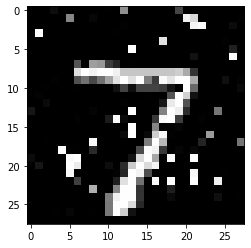

迭代: 183 置信度 0.14757547
迭代成功


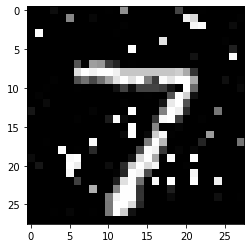

迭代: 184 置信度 0.16165322
迭代: 185 置信度 0.23374352
迭代: 186 置信度 0.19114809
迭代: 187 置信度 0.1842313
迭代: 188 置信度 0.21916749
迭代: 189 置信度 0.14820445
迭代: 190 置信度 0.16440661
迭代: 191 置信度 0.36444047
迭代: 192 置信度 0.18155034
迭代: 193 置信度 0.19215426
迭代: 194 置信度 0.18255395
迭代: 195 置信度 0.22550808
迭代: 196 置信度 0.21474172
迭代: 197 置信度 0.15118054
迭代: 198 置信度 0.4491291
迭代: 199 置信度 0.19032964
迭代: 200 置信度 0.14752589
迭代成功


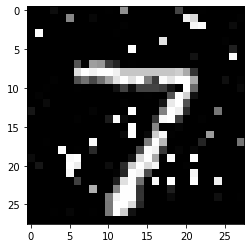

迭代: 201 置信度 0.16986097
迭代: 202 置信度 0.21629573
迭代: 203 置信度 0.17561705
迭代: 204 置信度 0.18589018
迭代: 205 置信度 0.23528022
迭代: 206 置信度 0.15154159
迭代: 207 置信度 0.2294776
迭代: 208 置信度 0.23290494
迭代: 209 置信度 0.28235713
迭代: 210 置信度 0.24295653
迭代: 211 置信度 0.22605453
迭代: 212 置信度 0.17678899
迭代: 213 置信度 0.15671282
迭代: 214 置信度 0.2917364
迭代: 215 置信度 0.18483049
迭代: 216 置信度 0.2048697
迭代: 217 置信度 0.23009953
迭代: 218 置信度 0.17389978
迭代: 219 置信度 0.32790962
迭代: 220 置信度 0.1607113
迭代: 221 置信度 0.15605468
迭代: 222 置信度 0.17671376
迭代: 223 置信度 0.20391029
迭代: 224 置信度 0.20876811
迭代: 225 置信度 0.20076816
迭代: 226 置信度 0.2251491
迭代: 227 置信度 0.20953847
迭代: 228 置信度 0.17597058
迭代: 229 置信度 0.17087762
迭代: 230 置信度 0.2146209
迭代: 231 置信度 0.23757851
迭代: 232 置信度 0.2429996
迭代: 233 置信度 0.21001256
迭代: 234 置信度 0.15684207
迭代: 235 置信度 0.16362251
迭代: 236 置信度 0.39485553
迭代: 237 置信度 0.1921884
迭代: 238 置信度 0.20739268
迭代: 239 置信度 0.15298405
迭代: 240 置信度 0.26020065
迭代: 241 置信度 0.30124664
迭代: 242 置信度 0.24520174
迭代: 243 置信度 0.15978208
迭代: 244 置信度 0.19005

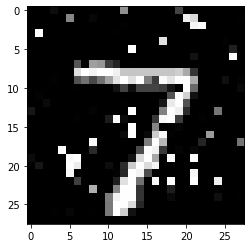

迭代: 310 置信度 0.27656323
迭代: 311 置信度 0.3563184
迭代: 312 置信度 0.20927823
迭代: 313 置信度 0.2191305
迭代: 314 置信度 0.28280532
迭代: 315 置信度 0.28551462
迭代: 316 置信度 0.1972327
迭代: 317 置信度 0.18749613
迭代: 318 置信度 0.2543706
迭代: 319 置信度 0.19707255
迭代: 320 置信度 0.21788545
迭代: 321 置信度 0.26659706
迭代: 322 置信度 0.21167023
迭代: 323 置信度 0.19681759
迭代: 324 置信度 0.3777319
迭代: 325 置信度 0.14932775
迭代: 326 置信度 0.21235298
迭代: 327 置信度 0.17362891
迭代: 328 置信度 0.30390385
迭代: 329 置信度 0.24559607
迭代: 330 置信度 0.22920291
迭代: 331 置信度 0.19709907
迭代: 332 置信度 0.230464
迭代: 333 置信度 0.21761988
迭代: 334 置信度 0.21219338
迭代: 335 置信度 0.18179248
迭代: 336 置信度 0.19622955
迭代: 337 置信度 0.2390274
迭代: 338 置信度 0.24102646
迭代: 339 置信度 0.18922438
迭代: 340 置信度 0.30027172
迭代: 341 置信度 0.15266378
迭代: 342 置信度 0.36065492
迭代: 343 置信度 0.16058923
迭代: 344 置信度 0.15222284
迭代: 345 置信度 0.19086336
迭代: 346 置信度 0.2221713
迭代: 347 置信度 0.2956051
迭代: 348 置信度 0.20218673
迭代: 349 置信度 0.19170207
迭代: 350 置信度 0.34163937
迭代: 351 置信度 0.22075929
迭代: 352 置信度 0.2185703
迭代: 353 置信度 0.21423428

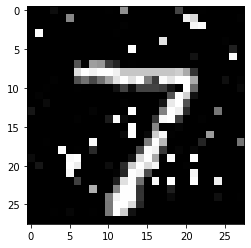

迭代: 477 置信度 0.2082366
迭代: 478 置信度 0.23220493
迭代: 479 置信度 0.2337286
迭代: 480 置信度 0.1677097
迭代: 481 置信度 0.29217747
迭代: 482 置信度 0.33040607
迭代: 483 置信度 0.2275897
迭代: 484 置信度 0.1986705
迭代: 485 置信度 0.28020224
迭代: 486 置信度 0.3396114
迭代: 487 置信度 0.15660249
迭代: 488 置信度 0.29170153
迭代: 489 置信度 0.16215232
迭代: 490 置信度 0.18860835
迭代: 491 置信度 0.19829807
迭代: 492 置信度 0.17875606
迭代: 493 置信度 0.15836921
迭代: 494 置信度 0.2646887
迭代: 495 置信度 0.18260355
迭代: 496 置信度 0.16562745
迭代: 497 置信度 0.16971916
迭代: 498 置信度 0.1871967
迭代: 499 置信度 0.16157515
迭代: 500 置信度 0.4878735
迭代: 501 置信度 0.6330614
迭代: 502 置信度 0.19471307
迭代: 503 置信度 0.4421202
迭代: 504 置信度 0.27278677
迭代: 505 置信度 0.19734532
迭代: 506 置信度 0.23596914
迭代: 507 置信度 0.16333082
迭代: 508 置信度 0.18352424
迭代: 509 置信度 0.18137383
迭代: 510 置信度 0.3087311
迭代: 511 置信度 0.18077447
迭代: 512 置信度 0.21365315
迭代: 513 置信度 0.23365338
迭代: 514 置信度 0.31487218
迭代: 515 置信度 0.1951209
迭代: 516 置信度 0.18117748
迭代: 517 置信度 0.15323228
迭代: 518 置信度 0.19382213
迭代: 519 置信度 0.24141897
迭代: 520 置信度 0.30722725
迭

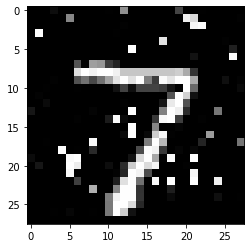

迭代: 591 置信度 0.3347907
迭代: 592 置信度 0.1928151
迭代: 593 置信度 0.32073054
迭代: 594 置信度 0.4124969
迭代: 595 置信度 0.21520992
迭代: 596 置信度 0.23998143
迭代: 597 置信度 0.17180228
迭代: 598 置信度 0.20058894
迭代: 599 置信度 0.22372629
迭代: 600 置信度 0.16872075
迭代: 601 置信度 0.30485344
迭代: 602 置信度 0.16702607
迭代: 603 置信度 0.3504554
迭代: 604 置信度 0.14817582
迭代: 605 置信度 0.32271063
迭代: 606 置信度 0.19297217
迭代: 607 置信度 0.23905255
迭代: 608 置信度 0.18825041
迭代: 609 置信度 0.21718577
迭代: 610 置信度 0.17770126
迭代: 611 置信度 0.1726862
迭代: 612 置信度 0.18897319
迭代: 613 置信度 0.24552906
迭代: 614 置信度 0.37299153
迭代: 615 置信度 0.20678967
迭代: 616 置信度 0.23210931
迭代: 617 置信度 0.24444535
迭代: 618 置信度 0.2203911
迭代: 619 置信度 0.22146389
迭代: 620 置信度 0.14809641
迭代: 621 置信度 0.31552157
迭代: 622 置信度 0.21531777
迭代: 623 置信度 0.21815898
迭代: 624 置信度 0.15768337
迭代: 625 置信度 0.19562297
迭代: 626 置信度 0.17558149
迭代: 627 置信度 0.22646096
迭代: 628 置信度 0.3137414
迭代: 629 置信度 0.26305106
迭代: 630 置信度 0.2998238
迭代: 631 置信度 0.48115745
迭代: 632 置信度 0.21511626
迭代: 633 置信度 0.24022543
迭代: 634 置信度 0.21430

迭代: 952 置信度 0.19816579
迭代: 953 置信度 0.20139278
迭代: 954 置信度 0.27650777
迭代: 955 置信度 0.25851673
迭代: 956 置信度 0.15566565
迭代: 957 置信度 0.17558192
迭代: 958 置信度 0.18641198
迭代: 959 置信度 0.2970056
迭代: 960 置信度 0.25554925
迭代: 961 置信度 0.22747973
迭代: 962 置信度 0.21571738
迭代: 963 置信度 0.24903177
迭代: 964 置信度 0.23864497
迭代: 965 置信度 0.16555054
迭代: 966 置信度 0.18950026
迭代: 967 置信度 0.20456095
迭代: 968 置信度 0.19759479
迭代: 969 置信度 0.15343349
迭代: 970 置信度 0.14710024
迭代: 971 置信度 0.23646721
迭代: 972 置信度 0.26055992
迭代: 973 置信度 0.3990063
迭代: 974 置信度 0.2019129
迭代: 975 置信度 0.17200081
迭代: 976 置信度 0.35150084
迭代: 977 置信度 0.27381894
迭代: 978 置信度 0.2665953
迭代: 979 置信度 0.15742268
迭代: 980 置信度 0.1936533
迭代: 981 置信度 0.1927728
迭代: 982 置信度 0.15194382
迭代: 983 置信度 0.22355686
迭代: 984 置信度 0.2560196
迭代: 985 置信度 0.17778529
迭代: 986 置信度 0.18341385
迭代: 987 置信度 0.17003386
迭代: 988 置信度 0.34660214
迭代: 989 置信度 0.29836172
迭代: 990 置信度 0.269803
迭代: 991 置信度 0.1860318
迭代: 992 置信度 0.35339403
迭代: 993 置信度 0.20210518
迭代: 994 置信度 0.20816264
迭代: 995 置信度 0.3356431

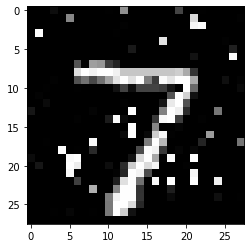

最终置信度： 0.1806216
[3.2562062e-03 1.1364534e-03 2.2132005e-01 5.6042480e-01 1.2986250e-04
 1.7873483e-02 3.7606482e-05 1.8062159e-01 1.3476619e-02 1.7233142e-03]


In [11]:
# 原图改变值减小置信度（累计循环1000代）
import copy
x_t = copy.deepcopy(x_dif)
count = 0
M = 1002     # 底数
for t in range(1000):
    x_f = copy.deepcopy(x_t)
    for i in range(784):
            if x_f[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    y = random.randint(0,10000)/10000
                    if y > 0.3:
                        if abs(x_f[i]) > 0.8:
                            m = math.ceil(1+7*(1-count/M))
                            if x_f[i] > 0:
                                x_f[i] = random.randint(1,m)/10
                            elif x_f[i] < 0:
                                x_f[i] = -random.randint(1,m)/10
                    if y <= 0.3:
                        x_f[i] = 0 
    count += 1
    print("迭代:",count,"置信度",Func(x_f))
    if Func(x_f) < Func(x_t):
        x_t = x_f
        print("迭代成功")
        f = x_t+x_test[0]/255
        plt.imshow(f.reshape(28,28),cmap='gray')
        plt.show()
F = x_f+x_test[0]/255
plt.imshow(F.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(F.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

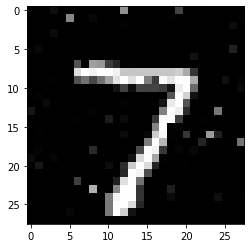

置信度： 0.9905353
[3.4097058e-04 6.8650523e-05 2.7454228e-03 4.5429049e-03 3.3036533e-05
 4.5153088e-04 2.2833087e-06 9.9053532e-01 1.9898760e-04 1.0809292e-03]


In [48]:
# test
import copy
x_f = copy.deepcopy(x_dif)
for i in range(784):
    if abs(x_f[i]) > 0.8:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

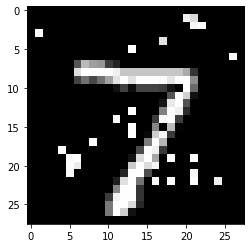

置信度： 0.3893921
[2.0558969e-03 9.4956340e-04 1.9136420e-01 3.9770034e-01 1.0873449e-04
 9.4524734e-03 1.6104059e-05 3.8939211e-01 7.2888527e-03 1.6716478e-03]


In [9]:
# test
import copy
x_f = copy.deepcopy(x_dif)
for i in range(784):
    if abs(x_f[i]) < 0.8:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

0.7532865
0.4889717
0.5027556
0.6872612
0.41092217
0.55867875
0.5592632
0.55446494
0.43673283
0.4908534
0.61393166
0.572012
0.45296532
0.70098495
0.62949336
0.4281742
0.39883238
0.54716027
0.48560932
0.6098192
0.5382706
0.5914648
0.51619345
0.48592123
0.48876065
0.48393255
0.5493107
0.5376365
0.40425614
0.7472338
0.5803521
0.44859764
0.83785945
0.6572758
0.57630765
0.3893921
0.74396574
0.5667778
0.47356617
0.501821
0.39437097
0.59971213
0.5224451
0.522243
0.6466309
0.6863635
0.5847432
0.41176164
0.5420972
0.55111945
0.66160256
0.557148
0.5238389
0.42281115
0.6060554
0.6155197
0.4728897
0.5887132
0.5687732
0.6560871
0.46363866
0.43110698
0.45651335
0.5517517
0.72012645
0.49412385
0.583757
0.68008757
0.3893921
0.5058125
0.5124957
0.4069887
0.58433527
0.44531104
0.6934921
0.44210556
0.4273637
0.3893921
0.42849514
0.3893921
0.6422042
0.5215052
0.55508643
0.4661828
0.6808048
0.4096288
0.59276
0.6113185
0.61301035
0.5886052
0.3893921
0.559101
0.5794053
0.5361211
0.5070408
0.56044
0.60035884


0.40212056
0.48138255
0.43988174
0.523553
0.40113372
0.51268697
0.5646449
0.47364762
0.7501834
0.5118009
0.5785504
0.59242684
0.4577905
0.45161024
0.5927413
0.41176164
0.4456892
0.64833564
0.6273196
0.48843884
0.58452964
0.3893921
0.5120709
0.6763055
0.42993098
0.6497851
0.40425614
0.6365418
0.49874946
0.3893921
0.6525099
0.728773
0.6123105
0.58010143
0.5634052
0.43156984
0.6615056
0.44852298
0.5192822
0.50453585
0.3893921
0.63708115
0.60973746
0.8716926
0.5794053
0.47409648
0.3893921
0.55004704
0.5819888
0.57755286
0.47827953
0.48628512
0.54133457
0.47098848
0.44250107
0.47605613
0.53021705
0.5434748
0.68303084
0.52730846
0.499269
0.47364762
0.5231229
0.5886052
0.55961555
0.45161024
0.4456892
0.3893921
0.51628363
0.8105205
0.43995816
0.4180919
0.42114916
0.45161024
0.46705586
0.3893921
0.512375
0.6699917
0.4083414
0.42520958
0.45694822
0.47336963
0.6757161
0.462669
0.4310348
0.6085266
0.48343864
0.46927932
0.6484434
0.41500765
0.7728787
0.681894
0.8089918
0.63100624
0.5552301
0.475392

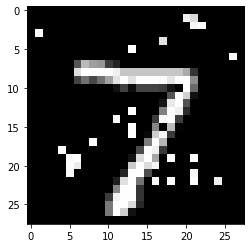

最终置信度： 0.3893921
[2.0558969e-03 9.4956340e-04 1.9136420e-01 3.9770034e-01 1.0873449e-04
 9.4524734e-03 1.6104059e-05 3.8939211e-01 7.2888527e-03 1.6716478e-03]


In [10]:
# 改变值减小置信度
x_t = copy.deepcopy(x_f)
count = 0
for t in range(10):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    y = random.randint(0,10000)/10000
                    if y > 0.8:
                        if x_f1[i] > 0:
                            x_f1[i] = random.randint(1,8)/10
                        elif x_f1[i] < 0:
                            x_f1[i] = -random.randint(1,8)/10
                    if y <= 0.8:
                        x_f1[i] = 0 
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

0.59630513
0.42690742
0.50655967
0.6110832
0.5102631
0.4490917
0.4811933
0.41749603
0.48189637
0.48310712
0.6084928
0.55325955
0.49101678
0.5368255
0.65057594
0.5650886
0.46163395
0.6459118
0.5527594
0.5802988
0.4306779
0.4475693
0.59338814
0.44361398
0.3893921
0.6320245
0.4863194
0.530641
0.46962252
0.5475177
0.6782748
0.5233284
0.47742048
0.58011967
0.78267556
0.4811413
0.72664726
0.44941983
0.4607407
0.44343105
0.64572215
0.45135823
0.357111
迭代: 1
置信度： 0.357111


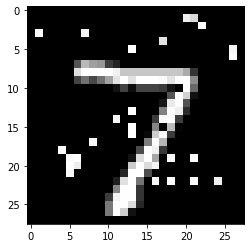

0.4501279
0.56702906
0.35094333
迭代: 2
置信度： 0.35094333


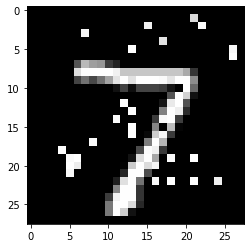

0.62401897
0.564439
0.6460109
0.59652275
0.38063774
0.51129085
0.47265136
0.3952677
0.43314457
0.5211361
0.4132208
0.46498698
0.5382431
0.35094333
0.7596984
0.52360106
0.66665107
0.46729994
0.66365004
0.6718668
0.55666965
0.4734209
0.62558544
0.33762214
迭代: 3
置信度： 0.33762214


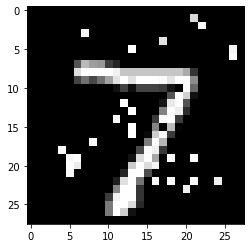

0.38150403
0.55845296
0.36095196
0.35536823
0.44096097
0.582699
0.6896035
0.43962097
0.38415182
0.43432802
0.36127612
0.55919385
0.49067044
0.35589018
0.4401271
0.68856573
0.40126503
0.57792646
0.54878706
0.40333578
0.3692772
0.43608224
0.54133445
0.33279938
迭代: 4
置信度： 0.33279938


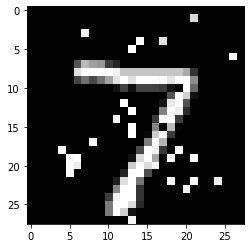

0.36672518
0.7801865
0.4055264
0.40779218
0.37559772
0.6106753
0.4269613
0.42479825
0.3631115
0.40343523
0.3861339
0.39244998
0.6310451
0.61182725
0.4014935
0.5358465
0.6418313
0.5152161
0.3932357
0.68036884
0.4942761
0.68561286
0.4541422
0.35983083
0.4222768
0.3033384
迭代: 5
置信度： 0.3033384


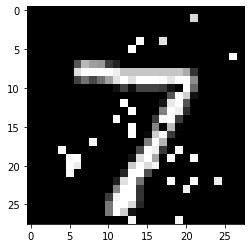

0.5055596
0.35152477
0.42703286
0.57683855
0.5527859
0.5089292
0.49742022
0.45548594
0.45553392
0.38716877
0.56366163
0.5216532
0.4216905
0.47596458
0.56663054
0.26071215
迭代: 6
置信度： 0.26071215


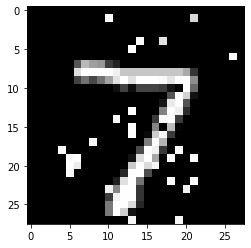

0.38915667
0.46627158
0.30774114
0.3760725
0.46798077
0.41780913
0.5996617
0.37313756
0.28593427
0.58584315
0.4575459
0.5035284
0.669057
0.50120145
0.32343978
0.3023405
0.36605617
0.30329552
0.2837726
0.72872514
0.4867738
0.27053976
0.4617032
0.3709583
0.42575625
0.37753224
0.42242527
0.35491413
0.60179824
0.29675466
0.27512306
0.37870476
0.3411256
0.36926568
0.45083895
0.3033191
0.55237764
0.3288501
0.4846503
0.3697255
0.2743728
0.26071215
0.49909517
0.46894893
0.41345617
0.690285
0.4968244
0.3885019
0.39252532
0.7438526
0.3241215
0.39335495
0.26071215
0.26071215
0.39613897
0.5600746
0.28134796
0.3602227
0.63405
0.34301856
0.36035663
0.26071215
0.46597663
0.31978825
0.42247513
0.39847875
0.4278018
0.59232885
0.41033965
0.59947723
0.36819798
0.39480913
0.42895293
0.33242622
0.37256825
0.861329
0.4594671
0.38332438
0.4581017
0.35147905
0.4914839
0.35044673
0.280889
0.38485008
0.4970362
0.38827434
0.367991
0.6900713
0.35606813
0.3846276
0.49579692
0.31080782
0.3691825
0.41227385
0.381409

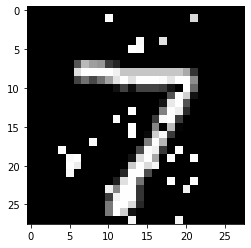

0.3222863
0.28147605
0.37195417
0.381017
0.23608597
0.28466842
0.2833577
0.33848423
0.43501824
0.33532962
0.4210123
0.22799772
迭代: 8
置信度： 0.22799772


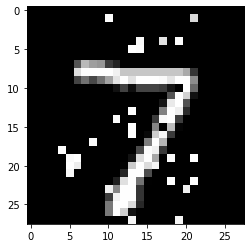

0.22799772
0.26978347
0.37062117
0.27295
0.32953227
0.42565903
0.25914845
0.43828076
0.26219693
0.40609065
0.44236523
0.3492957
0.29743943
0.40719545
0.27725357
0.35732082
0.261798
0.5339151
0.269526
0.4497661
0.5206776
0.43947586
0.37719244
0.2986337
0.5309876
0.372745
0.4368668
0.28252906
0.30886018
0.2760789
0.36415303
0.4691833
0.74110496
0.36396262
0.39772606
0.461681
0.30608344
0.34207824
0.2675156
0.35681954
0.5872181
0.31873822
0.37805277
0.26653078
0.43480048
0.48195136
0.2869161
0.34538174
0.38458905
0.34851816
0.23928201
0.5087322
0.34483728
0.3933777
0.5588609
0.3376413
0.3326753
0.61029273
0.49523476
0.4521792
0.24757144
0.22154985
迭代: 9
置信度： 0.22154985


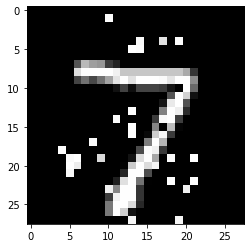

0.82156956
0.25734755
0.24362347
0.29905796
0.370821
0.25851858
0.45074767
0.38713443
0.22154985
0.22154985
0.54736197
0.27868107
0.26500127
0.45683247
0.33242044
0.40788192
0.71581084
0.36408597
0.3136089
0.43747535
0.22154985
0.4561201
0.315384
0.23824938
0.41516492
0.37153938
0.32212305
0.519349
0.4031762
0.33074558
0.40644246
0.29620755
0.3300802
0.22154985
0.2615428
0.31108102
0.35141575
0.37902477
0.36686003
0.32997873
0.24696976
0.31895265
0.3645967
0.21617743
迭代: 10
置信度： 0.21617743


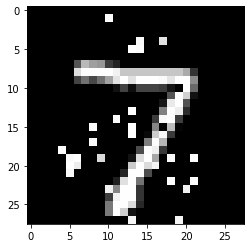

0.21598703
迭代: 11
置信度： 0.21598703


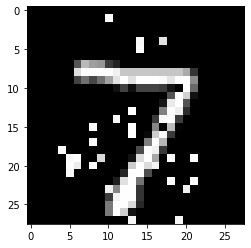

0.27207005
0.28738347
0.5049326
0.2718564
0.24814294
0.2764754
0.5106223
0.23825097
0.5446567
0.27790734
0.26894048
0.2961851
0.21582378
迭代: 12
置信度： 0.21582378


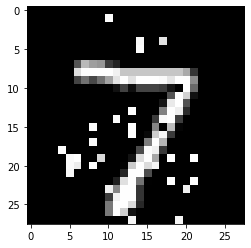

0.30959433
0.47203013
0.49187508
0.43097848
0.2406896
0.33436736
0.25477922
0.27635807
0.31621724
0.3616324
0.21582378
0.4415697
0.48205432
0.501142
0.55078465
0.3721529
0.3089936
0.29485247
0.2581546
0.4717928
0.21582378
0.33968335
0.20697857
迭代: 13
置信度： 0.20697857


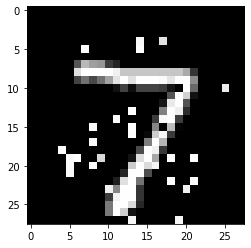

0.40230542
0.38514477
0.42170173
0.24976523
0.41497716
0.46278742
0.30526167
0.32492283
0.23766366
0.4143561
0.28090566
0.30558047
0.35170734
0.6708518
0.3171716
0.6952531
0.22387026
0.38027614
0.34587
0.34663224
0.23477751
0.49430966
0.2770964
0.20697857
0.31260124
0.31673303
0.43912387
0.37750795
0.60911965
0.4466732
0.331569
0.46064404
0.30938315
0.30227008
0.3506876
0.24502048
0.2856788
0.2562256
0.34788558
0.29935446
0.27834627
0.2229874
0.23764499
0.25181195
0.25686166
0.20697857
0.22473708
0.6399523
0.3145836
0.30090427
0.46759653
0.3915185
0.73404056
0.4096186
0.25250593
0.44327542
0.5448309
0.5565243
0.37653604
0.22849055
0.49275038
0.46826693
0.50451463
0.27459675
0.43151355
0.26149514
0.20697857
0.38350698
0.20697857
0.35339624
0.22144309
0.34083876
0.34873447
0.3275017
0.3338319
0.53214717
0.33872277
0.32723314
0.2686262
0.27757367
0.26615763
0.363902
0.25624138
0.3413986
0.40268368
0.55203956
0.2926706
0.36529392
0.3818702
0.3070948
0.22447908
0.6774588
0.36447915
0.341376

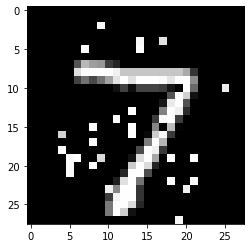

0.61381733
0.30140886
0.19861741
0.34465328
0.39726275
0.24172786
0.28084937
0.32965374
0.27803838
0.23751283
0.3591476
0.30061546
0.1977263
0.44402668
0.4453599
0.42534968
0.32902882
0.23840743
0.31948942
0.46809715
0.24511121
0.21038286
0.21772441
0.26466024
0.1977263
0.25107583
0.70570874
0.33534643
0.17757325
迭代: 15
置信度： 0.17757325


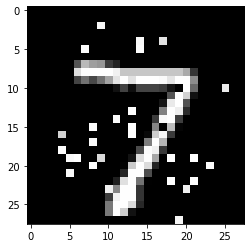

0.27358308
0.55048394
0.19085075
0.3020913
0.22935548
0.24788624
0.3048264
0.46286806
0.26579854
0.27803794
0.53522706
0.39861432
0.34769297
0.3670472
0.18362904
0.32471713
0.48590204
0.307119
0.29068866
0.21110691
0.47649208
0.23205593
0.47770122
0.25842115
0.24135073
0.19127092
0.28026393
0.44137475
0.216959
0.288426
0.30567464
0.27753165
0.24200346
0.5458033
0.26844862
0.2202571
0.28081897
0.5045555
0.17757325
0.36758244
0.35505083
0.214599
0.19541997
0.1983637
0.17771891
0.3998997
0.27564573
0.27426726
0.37779677
0.257819
0.44807753
0.31079596
0.37314516
0.14850071
迭代: 16
置信度： 0.14850071


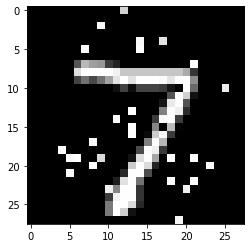

0.3769783
0.263079
0.35694566
0.3105306
0.23580949
0.43572527
0.25613526
0.3930715
0.37212607
0.4333516
0.48611543
0.31664628
0.17791227
0.46714875
0.19716182
0.38064194
0.21064071
0.23249172
0.38426423
0.5537626
0.3853337
0.24538492
0.4228331
0.15644088
0.14834824
迭代: 17
置信度： 0.14834824


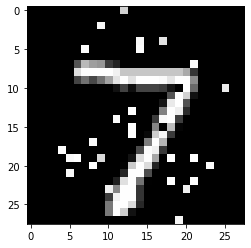

0.2829757
0.22157519
0.26996982
0.26253867
0.14819019
迭代: 18
置信度： 0.14819019


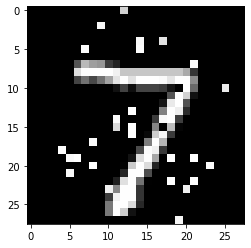

0.16110851
0.20272857
0.44318217
0.18359978
0.26270714
0.41429538
0.20540594
0.25725514
0.14819019
0.20366763
0.3863255
0.1757736
0.27965668
0.18654574
0.18765415
0.2551356
0.24761073
0.22449431
0.14819019
0.27975377
0.33769083
0.16685481
0.47729677
0.1775694
0.17202902
0.25565603
0.3211115
0.20716459
0.36040697
0.24106255
0.20666295
0.14819019
0.17741176
0.15400034
0.22063418
0.3681668
0.4928417
0.2251925
0.23188935
0.26874205
0.13841932
迭代: 19
置信度： 0.13841932


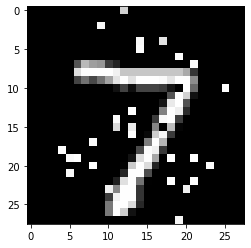

0.2797266
0.17850222
0.17795756
0.15841876
0.24844301
0.3291746
0.1692509
0.5244903
0.28229728
0.19002727
0.1571406
0.14177449
0.21217875
0.26316735
0.16690473
0.26805642
0.2576717
0.3220067
0.4901073
0.1506544
0.13841932
0.17659442
0.27678794
0.23531072
0.18565148
0.19145535
0.22001404
0.35460937
0.24966557
0.19015963
0.22993591
0.2982831
0.28762034
0.13841932
0.3709624
0.13438608
迭代: 20
置信度： 0.13438608


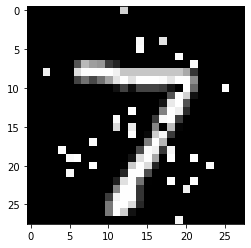

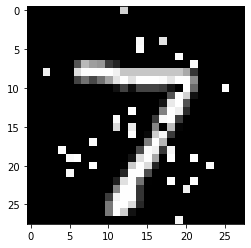

最终置信度： 0.13438608
[5.1539890e-03 7.4655650e-04 3.2068649e-01 5.1205546e-01 1.1018379e-04
 1.6623138e-02 4.4017837e-05 1.3438608e-01 8.8452464e-03 1.3489146e-03]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.82357685 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

In [18]:
# 改变坐标减小置信度
x_t = copy.deepcopy(x_f)
count = 0
for t in range(20):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][y]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  f_y >= 1.00000000e+00 or f_i >= 1.00000000e+00:
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])
print(f)

In [18]:
E = 0.38
x_f2 = copy.deepcopy(x_f)
x_f3 = copy.deepcopy(x_f)
while Func(x_f2) > E:
    for i in range(784):
        if x_f2[i] < 0:
            x_f2[i] = 0
    random.shuffle(x_f2)
    print(Func(x_f2))
    x_f2 = copy.deepcopy(x_f)
for i in range(784):
    if x_f3[i] > 0:
        x_f3[i] = 0
f = x_f2+x_f3+x_test[0]/255
for i in range (784):
    if abs(f[i]) > 1:
        f[i] = x_f2[i]
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

0.9937849
0.9966697
0.99653
0.9928515
0.9895746
0.9897552
0.9956233
0.99664426
0.9966703
0.99670863
0.99701095
0.9953047
0.99254686
0.99457836
0.9954882
0.9939845
0.9958261
0.9938758
0.99700266
0.9964114
0.9832019
0.9896046
0.99642855
0.98732156
0.9968658
0.9980305
0.994599
0.99698037
0.99397624
0.99371463
0.99663466
0.99590355
0.99892175
0.98089683
0.996506
0.99573404
0.9965988
0.99792445
0.9852174
0.99596405
0.9952676
0.99637383
0.9970999
0.99089724
0.9920195
0.99093413
0.9948137
0.99712247
0.9855097
0.9971308
0.9894471
0.99389005
0.9941433
0.99777776
0.99722254
0.99409074
0.99692035
0.9947103
0.9979279
0.9953047
0.9914806
0.99311537
0.9825864
0.99064916
0.99406683
0.99649185
0.9933571
0.9952513
0.9957325
0.9950186
0.979855
0.99764794
0.9943843
0.99767095
0.99829
0.9972307
0.9940831
0.99211955
0.9952343
0.9906605
0.99484247
0.99420905
0.99743253
0.9968585
0.9948515
0.99603003
0.9919926
0.9953483
0.98773986
0.9983364
0.9952573
0.9972638
0.9970528
0.99747807
0.9972247
0.99467355
0.9982

KeyboardInterrupt: 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.98229893 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.9968932  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.97825824
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.98931624
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.9850986  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

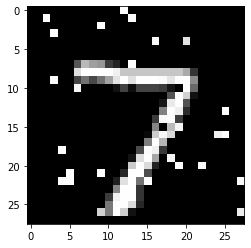

最终置信度： 0.963738
[1.0808634e-03 1.6884957e-04 1.6368348e-02 1.6524410e-02 3.9927374e-05
 1.1119458e-03 6.8982681e-06 9.6373802e-01 2.2268597e-04 7.3817343e-04]


In [14]:
x_f2 = copy.deepcopy(x_f)
x_f3 = copy.deepcopy(x_f)
for i in range(784):
    if x_f2[i] < 0:
        x_f2[i] = 0
random.shuffle(x_f2)
for i in range(784):
    if x_f3[i] > 0:
        x_f3[i] = 0
f = x_f2+x_f3+x_test[0]/255
for i in range (784):
    if abs(f[i]) > 1:
        f[i] = x_f2[i]

print(f)
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])